Importing the Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loanding Data From Loan CSV file

In [2]:
loan_df = pd.read_csv('C:\\Users\\91880\\Downloads\\Lending Club Case Study\\loan.csv')
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking for Null Values in Loans CSV

In [3]:
loan_df.isna().sum().sort_values(ascending=False)

num_il_tl                39717
num_bc_sats              39717
num_bc_tl                39717
num_actv_bc_tl           39717
num_accts_ever_120_pd    39717
                         ...  
installment                  0
policy_code                  0
application_type             0
acc_now_delinq               0
delinq_amnt                  0
Length: 111, dtype: int64

A lot of Empty Columns in Dataset, Dropping those columns and then checking the dataset shape

In [4]:
cols_dropped = 0
for col in sorted(loan_df.columns):
    if loan_df[col].isna().sum() == loan_df.shape[0]:
        cols_dropped = cols_dropped + 1
        
print(f'Percentage of dropped columns = {round(cols_dropped / loan_df.shape[1] * 100, 2)}%')


Percentage of dropped columns = 48.65%


In [5]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

Checking for Unique Values -> If the column has only a single unique value, it does not make any sense to include it as part of our data analysis. We need to find out those columns and drop them from the dataset

In [6]:
remove_columns_list = []
for i in loan_df.columns:
    # Check if unique value count is 1
    if loan_df[i].nunique() == 1:
        remove_columns_list.append(i)
    

# Remove those columns
loan_df.drop(remove_columns_list, axis = 1, inplace = True)
loan_df.shape

(39717, 48)

Checking for Duplicate Rows

In [7]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


There are no Duplicate Rows

Dropping records where loan_status = 'Current'
Dropping Columns Where missing data is more than 65% ( These olumsn will pollute our data analysis)
The loan in progress cannot provide us insights as to whether the borrower is likely to default or not. Hence, dropping those records

In [8]:
for col in loan_df.columns:
    missing_values = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
    if missing_values >= 0.65:
        loan_df.drop(col, axis = 1, inplace = True)
        
loan_df.shape

(39717, 45)

In [9]:
loan_df = loan_df[loan_df['loan_status'].str.lower() != "current"]
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


Dropping extra columns containing text like desc, emp_title, id, member_id, title, url, zip_code, etc. (full list below), will not provide any significant input

In [10]:
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

loan_df.drop(drop_cols, axis = 1, inplace = True)

In [11]:
loan_df.shape

(38577, 18)

Creating some Functions

In [12]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    """
    Create a Seaborn bar plot for a specified column in a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to be plotted on the x-axis.
        y_column (str, optional): The name of the column to be plotted on the y-axis. Default is None.
        hue_column (str, optional): The name of the column to use for color differentiation. Default is None.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (10, 6).
        x_tick_rotation (int, optional): Rotation value for x-axis ticks. Default is 90.
        freq_rotation (int, optional): Rotation value for the exact frequency labels on each bar. Default is 0.
        filter_column (str, optional): The name of the column to filter on. Default is None.
        filter_value (any, optional): The value to filter the data on. Default is None.

    Returns:
        None
    """
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [13]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    """
    Calculate the Interquartile Range (IQR) and the lower and upper bounds for outlier detection.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column for which to calculate the IQR and bounds.
        iqr_multiplier (float, optional): Multiplier for the IQR to determine bounds. Default is 1.5.

    Returns:
        dict: A dictionary containing the following values:
            - 'quartile1': The first quartile (25th percentile).
            - 'quartile3': The third quartile (75th percentile).
            - 'iqr': The Interquartile Range (IQR).
            - 'lower_bound': The lower bound for outlier detection.
            - 'upper_bound': The upper bound for outlier detection.
    """
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'iqr': iqr,
        'quartile1': quartile1,
        'quartile3': quartile3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }


In [14]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
    """
    Create a box plot for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be plotted.
        title (str, optional): The title of the plot. Default is None.
        orient (str): The orientation of the plot. Default is horizontal. Possible values - h, v.

    Returns:
        None
    """

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sns.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()


In [15]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, figsize=(8, 6)):
    """
    Create a histogram using Seaborn's histplot for a specified column in a DataFrame or Series.

    Parameters:
        data (pd.DataFrame or pd.Series): The data to be plotted.
        column (str): The name of the column or Series to be plotted.
        bins (int, optional): The number of bins in the histogram. Default is 10.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (8, 6).

    Returns:
        None
    """
    # Set the style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=True)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Show the plot
    plt.show()

In [16]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    """
    Create a countplot graph.

    Args:
        data_dict (dict): A dictionary containing the following keys:
            - 'data' (DataFrame): The DataFrame containing the data.
            - 'x' (str): The column to be plotted on the x-axis.
            - 'figsize' (tuple, optional): Size of the figure in (x, y) format.
            - 'hue' (str, optional): The column to be used for color differentiation (default None).
            - 'order' (list, optional): Order of categorical values on the x-axis (default None).
            - 'xlabel' (str, optional): Label for the x-axis (default None).
            - 'ylabel' (str, optional): Label for the y-axis (default None).
            - 'title' (str, optional): Title for the plot (default None).
            - 'palette' (list, optional): List of colors for the plot (default None).
            - 'x_tick_rotation' (int, optional): Rotation value for x-axis ticks.
        annot (bool): Boolean flag to show or hide annotations. Default is True.

    Returns:
        None
    """
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()


In [17]:
def plot_charged_off_percentage(df, column, stacked=False):
    """
    Calculate and plot the Charged Off percentage and the number of loans for a specified column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column for which to calculate and plot Charged Off percentage.
        stacked (bool, optional): Whether to create a stacked bar plot (default: False).

    Returns:
        None
    """
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()


In [18]:
def bucket_data(column, thresholds, labels) -> str:
    """
    Bucket data based on specified thresholds and labels.

    Parameters:
        column (float): The numeric value to be bucketed.
        thresholds (list of float): The list of threshold values for bucketing.
        labels (list of str): The list of labels corresponding to the buckets.

    Returns:
        str: The bucket label for the given column value.
    """
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]


In [19]:
def charged_off_percent(df, column, duration):
    charged_off = df[(df[column] == duration) & (df['loan_status'] == 'Charged Off')][column].value_counts()[duration]
    total = df[df[column] == duration][column].value_counts()[duration]
    return round((charged_off / total) * 100, 2)

In [20]:
loan_df = loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,0.0,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,0.0,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,0.0,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,0.0,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,0.0,wedding,A4,36 months,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500,1075.0,A,MORTGAGE,78.42,8.07%,Jul-07,2500,Fully Paid,NaN,home_improvement,A4,36 months,Not Verified
39713,NC,18000.0,6.40,3 years,8500,875.0,C,RENT,275.38,10.28%,Jul-07,8500,Fully Paid,NaN,credit_card,C1,36 months,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000,1325.0,A,MORTGAGE,156.84,8.07%,Jul-07,5000,Fully Paid,NaN,debt_consolidation,A4,36 months,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000,650.0,A,MORTGAGE,155.38,7.43%,Jul-07,5000,Fully Paid,NaN,other,A2,36 months,Not Verified


Data Conversion

In [21]:
loan_df = loan_df.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

loan_df['term'] = loan_df['term'].apply(lambda x: int(x.replace('months', '').strip()))

loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x, 2))

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')

In [22]:
#Outlier treatment
loan_df.annual_inc.value_counts().sort_index(ascending=False)

annual_inc
6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
            ..
4888.0       1
4800.0       4
4200.0       2
4080.0       1
4000.0       1
Name: count, Length: 5215, dtype: int64

Calculating Upper and Lower Bound

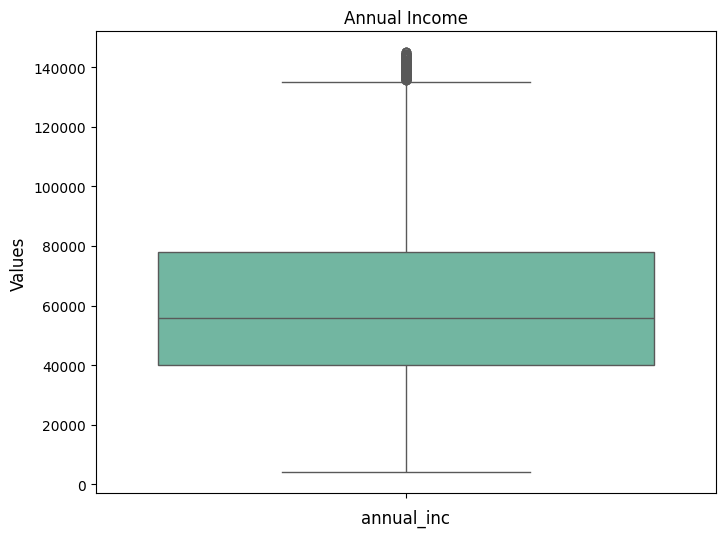

In [23]:
# Calculate the lower bound and upper bound
is_annual_inc_lb = calculate_boxplot_stats(loan_df, 'annual_inc')['lower_bound']
is_annual_inc_ub = calculate_boxplot_stats(loan_df, 'annual_inc')['upper_bound']
is_annual_inc_lt = loan_df.annual_inc > is_annual_inc_lb
is_annual_inc_gt = loan_df.annual_inc < is_annual_inc_ub

req_income = is_annual_inc_lt & is_annual_inc_gt

# Filter the rows with required annual income range between lower and upper bound
loan_df = loan_df[req_income]

# Show boxplot
create_boxplot(loan_df, 'annual_inc', title='Annual Income')

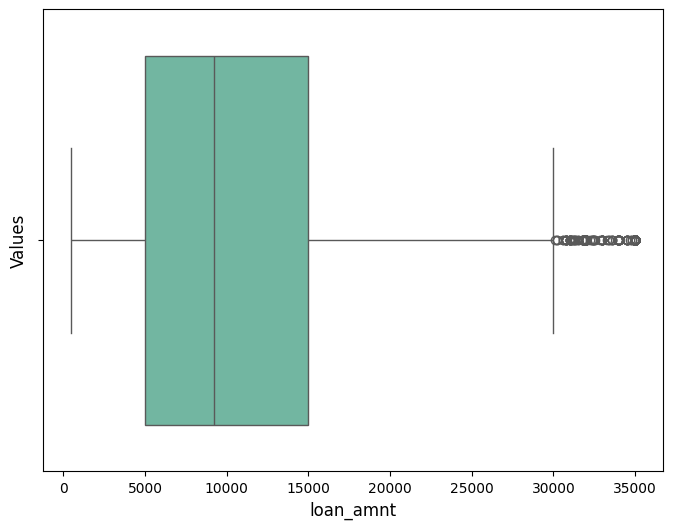

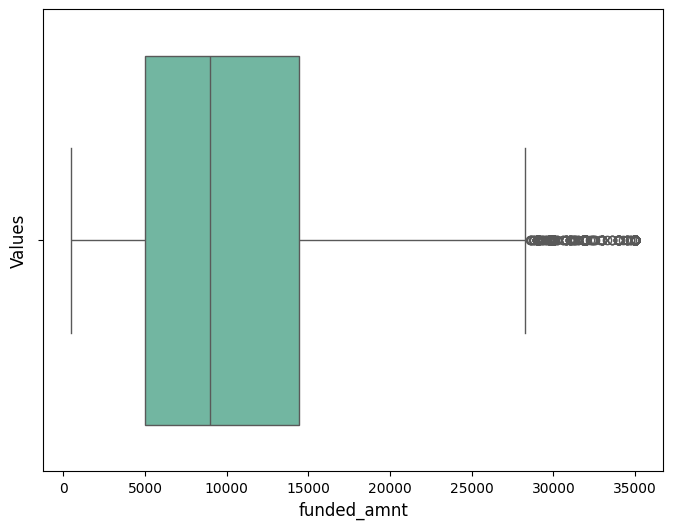

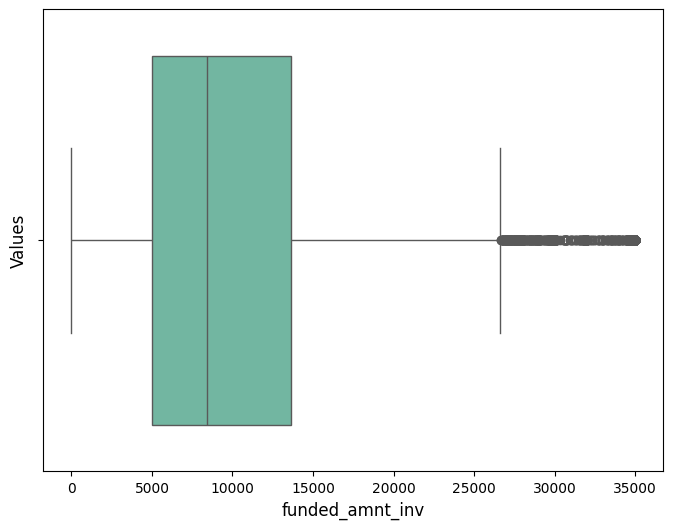

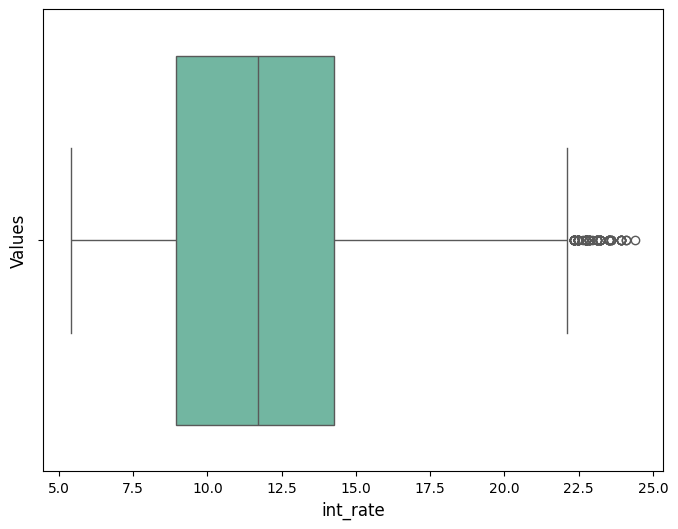

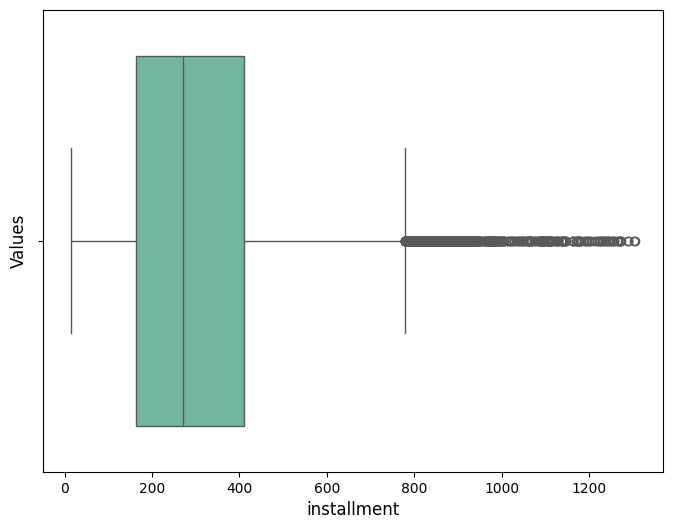

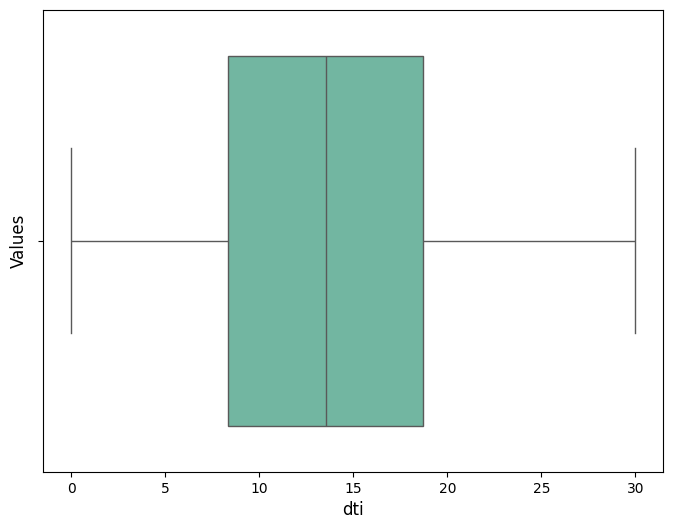

In [24]:
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    create_boxplot(loan_df, col, horizontal=False)

Cleaning out Column Data Based on Employees who own a Home and Have Higher tenure of working or Duration of Work

In [25]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          93
NONE            3
Name: count, dtype: int64

In [26]:
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)
loan_df.home_ownership.value_counts()
#replacing home owner of None and addign them in OTHER

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          96
Name: count, dtype: int64

In [27]:
# Replacing Source Verified and Verified as both are same
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)
loan_df.verification_status.value_counts()

verification_status
Verified        20448
Not Verified    16306
Name: count, dtype: int64

In [28]:
# removing Data for Bankrupcy as NA or NAN
loan_df.pub_rec_bankruptcies.isna().sum()

np.int64(660)

In [29]:
loan_df[loan_df.pub_rec_bankruptcies.isna()]

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
35006,NY,110000.0,7.07,< 1 year,15000.0,14875.00,A,MORTGAGE,476.58,8.94,2009-09-01,15000.0,Fully Paid,NaN,credit_card,A5,36,Not Verified
35058,TX,80800.0,14.97,3 years,3000.0,2988.24,C,MORTGAGE,102.92,14.26,2009-09-01,3000.0,Fully Paid,NaN,credit_card,C5,36,Not Verified
35362,MI,60000.0,11.08,< 1 year,4000.0,3892.26,B,MORTGAGE,131.22,11.14,2009-08-01,4000.0,Charged Off,NaN,car,B1,36,Not Verified
38443,NJ,37152.0,2.26,10+ years,2300.0,589.61,D,RENT,77.69,13.17,2008-08-01,2300.0,Fully Paid,NaN,moving,D2,36,Verified
38717,OH,75000.0,16.08,< 1 year,6000.0,500.00,A,MORTGAGE,188.02,8.00,2008-05-01,6000.0,Fully Paid,NaN,other,A3,36,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,15.55,5 years,5000.0,700.00,B,MORTGAGE,158.30,8.70,2007-07-01,5000.0,Fully Paid,NaN,credit_card,B1,36,Not Verified
39712,CO,110000.0,11.33,4 years,2500.0,1075.00,A,MORTGAGE,78.42,8.07,2007-07-01,2500.0,Fully Paid,NaN,home_improvement,A4,36,Not Verified
39713,NC,18000.0,6.40,3 years,8500.0,875.00,C,RENT,275.38,10.28,2007-07-01,8500.0,Fully Paid,NaN,credit_card,C1,36,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000.0,1325.00,A,MORTGAGE,156.84,8.07,2007-07-01,5000.0,Fully Paid,NaN,debt_consolidation,A4,36,Not Verified


In [30]:
loan_df = loan_df[loan_df.pub_rec_bankruptcies.notna()]

In [31]:
# Verify if the dataset has no longer null values
loan_df.isna().sum()

addr_state                 0
annual_inc                 0
dti                        0
emp_length              1015
funded_amnt                0
funded_amnt_inv            0
grade                      0
home_ownership             0
installment                0
int_rate                   0
issue_d                    0
loan_amnt                  0
loan_status                0
pub_rec_bankruptcies       0
purpose                    0
sub_grade                  0
term                       0
verification_status        0
dtype: int64

Here is our Cleaned Data

In [32]:
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65,2011-12-01,5000.0,Fully Paid,0.0,credit_card,B2,36,Verified
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27,2011-12-01,2500.0,Charged Off,0.0,car,C4,60,Verified
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96,2011-12-01,2400.0,Fully Paid,0.0,small_business,C5,36,Not Verified
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49,2011-12-01,10000.0,Fully Paid,0.0,other,C1,36,Verified
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90,2011-12-01,5000.0,Fully Paid,0.0,wedding,A4,36,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,VA,35000.0,7.51,1 year,4800.0,1100.0,C,RENT,155.52,10.28,2007-11-01,4800.0,Fully Paid,1.0,debt_consolidation,C1,36,Not Verified
39573,AZ,63500.0,8.50,3 years,7000.0,1000.0,C,MORTGAGE,227.82,10.59,2007-11-01,7000.0,Fully Paid,1.0,debt_consolidation,C2,36,Not Verified
39623,MD,39000.0,5.08,8 years,9000.0,700.0,D,MORTGAGE,301.04,12.49,2007-10-01,9000.0,Charged Off,1.0,debt_consolidation,D3,36,Not Verified
39666,VA,40000.0,13.50,2 years,15450.0,600.0,C,MORTGAGE,507.46,11.22,2007-08-01,15450.0,Charged Off,1.0,debt_consolidation,C4,36,Not Verified


#Now we will Proceed with data analysis
There will be 3 types of Data Analysis
1) Derived Columns
2) Univariate
3) Bivariate

1) Derived Columns

In [33]:
# Extracting Month and Year for analysis from issue_d
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_df['issue_q'] = loan_df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

loan_df[['issue_d', 'issue_m', 'issue_q']]



,issue_d,issue_m,issue_q
0,2011-12-01,12,Q4
1,2011-12-01,12,Q4
2,2011-12-01,12,Q4
3,2011-12-01,12,Q4
5,2011-12-01,12,Q4
...,...,...,...
39562,2007-11-01,11,Q4
39573,2007-11-01,11,Q4
39623,2007-10-01,10,Q4
39666,2007-08-01,8,Q3


Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"

In [34]:
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
loan_df['loan_paid'] = loan_df['loan_status'].map(loan_status_map)

# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

loan_df[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39562,4800.0,0 - 5K
39573,7000.0,5K - 10K
39623,9000.0,5K - 10K
39666,15450.0,15K - above


In [35]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

loan_df[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39562,10.28,9%-13%
39573,10.59,9%-13%
39623,12.49,9%-13%
39666,11.22,9%-13%


In [36]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

loan_df[['annual_inc', 'annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39562,35000.0,0 - 40k
39573,63500.0,60k - 70k
39623,39000.0,0 - 40k
39666,40000.0,40k - 50k


In [37]:
# Bucketting Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_df['funded_amnt_bucket'] = loan_df['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))

loan_df[['funded_amnt', 'funded_amnt_bucket']]

,funded_amnt,funded_amnt_bucket
0,5000.0,5k - 10k
1,2500.0,0 - 5k
2,2400.0,0 - 5k
3,10000.0,10k - 15k
5,5000.0,5k - 10k
...,...,...
39562,4800.0,0 - 5k
39573,7000.0,5k - 10k
39623,9000.0,5k - 10k
39666,15450.0,15k - above


In [38]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_df['dti_bucket'] = loan_df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

loan_df[['dti', 'dti_bucket']]

,dti,dti_bucket
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,Very High
5,11.20,Low
...,...,...
39562,7.51,Very Low
39573,8.50,Low
39623,5.08,Very Low
39666,13.50,Medium


2 Univariate Analysis

1) Categorical Variable - Ordered  Categorical Variable, Unordered Categorical Variable
2) Quantative Variable

Categorical variable - Ordered

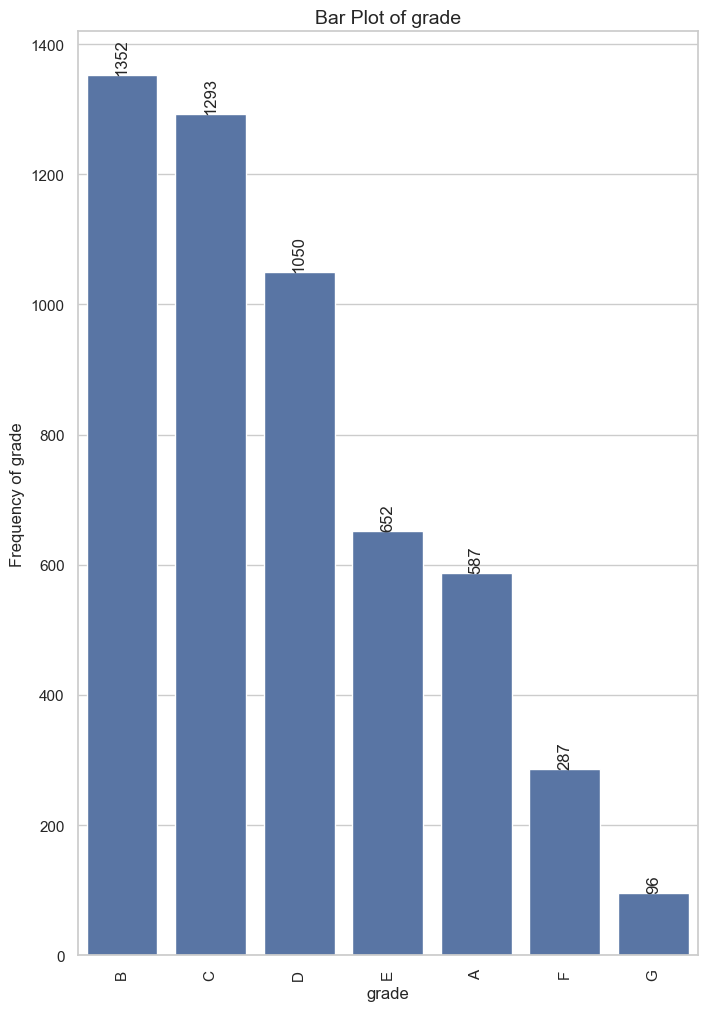

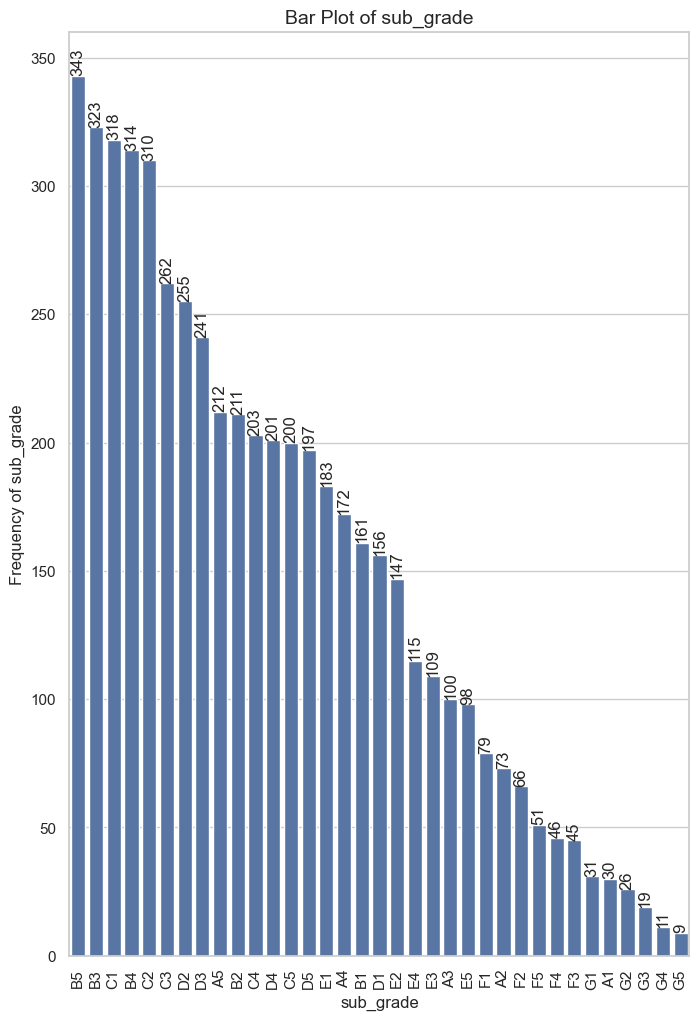

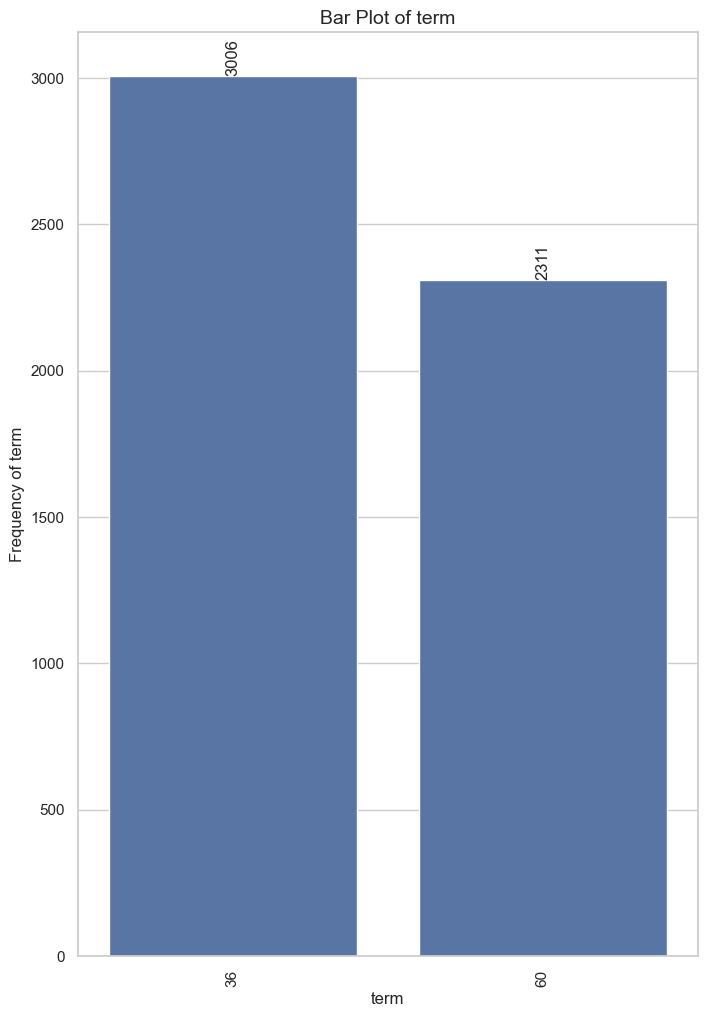

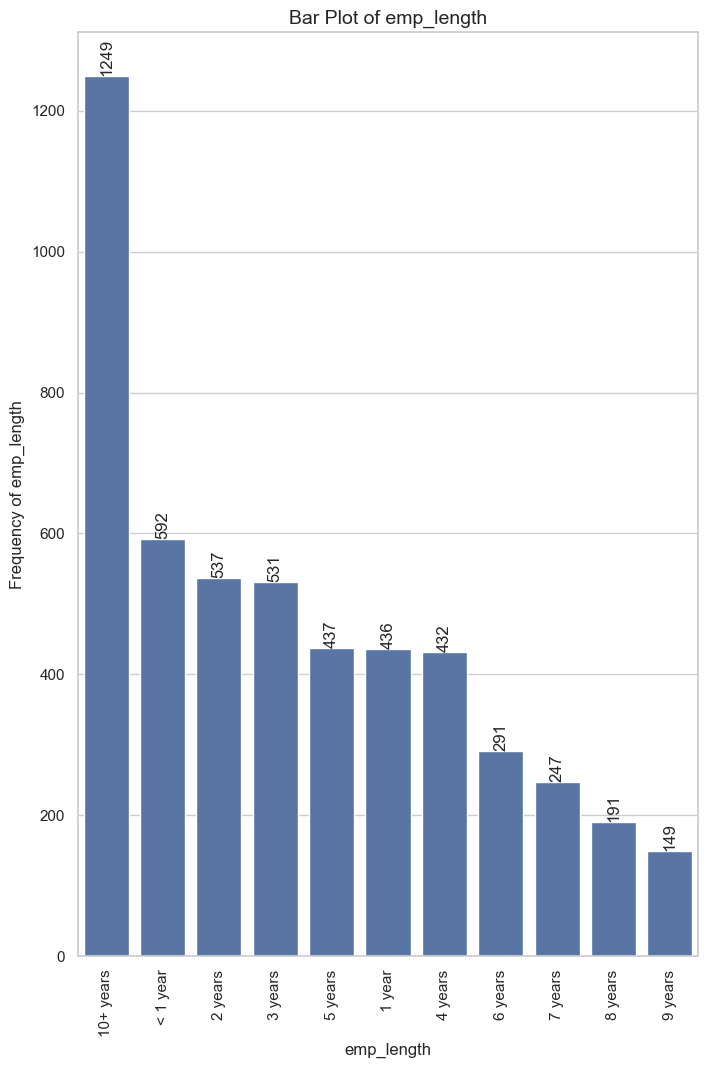

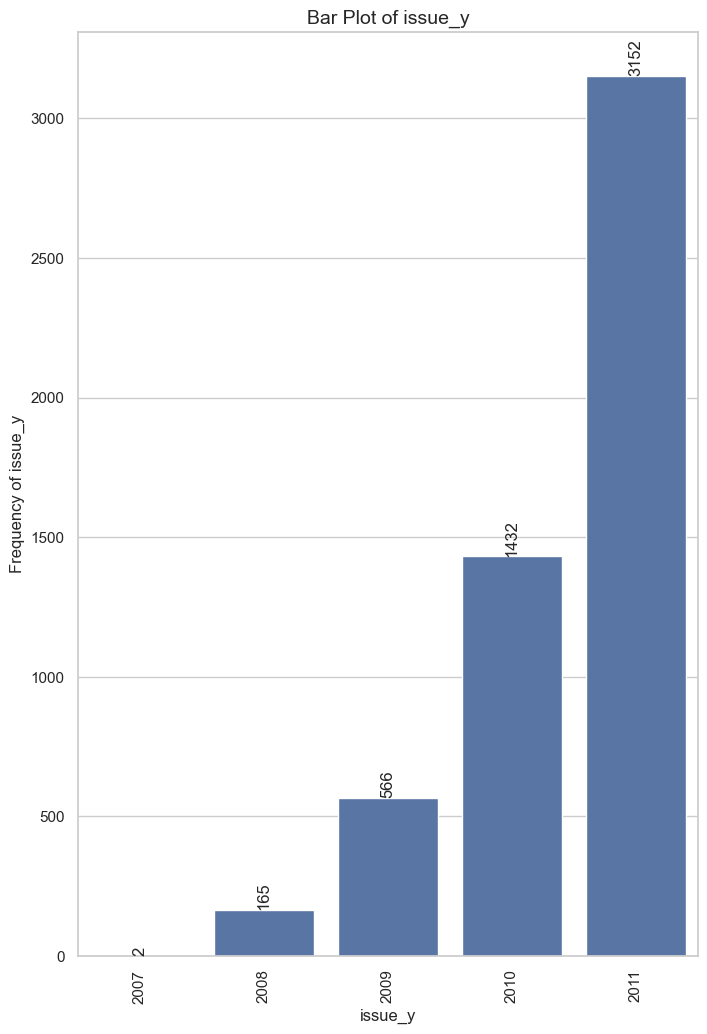

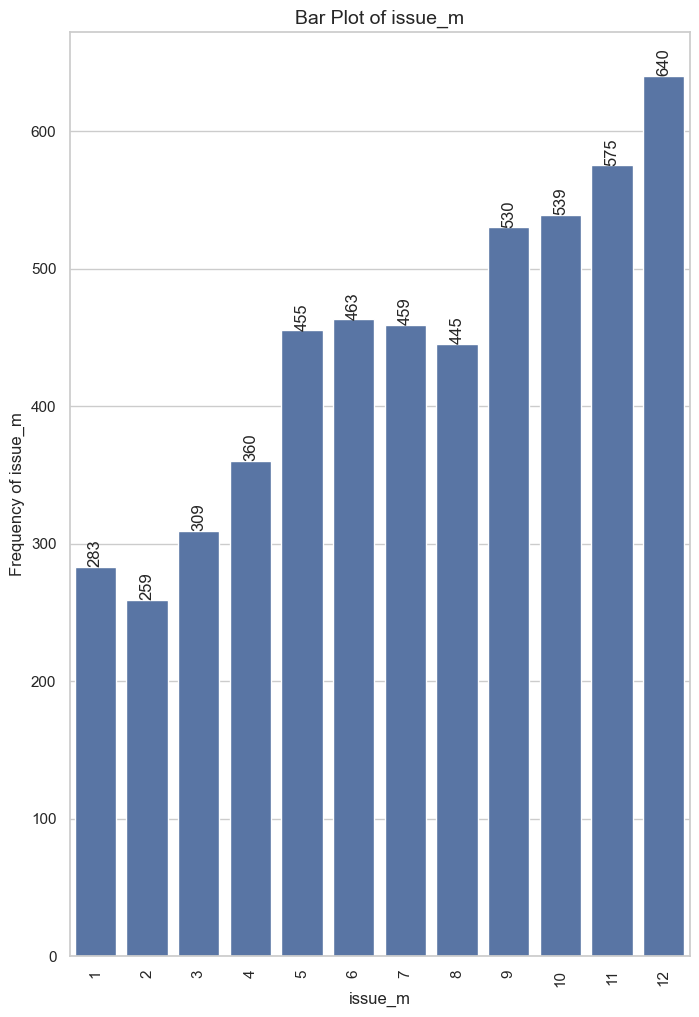

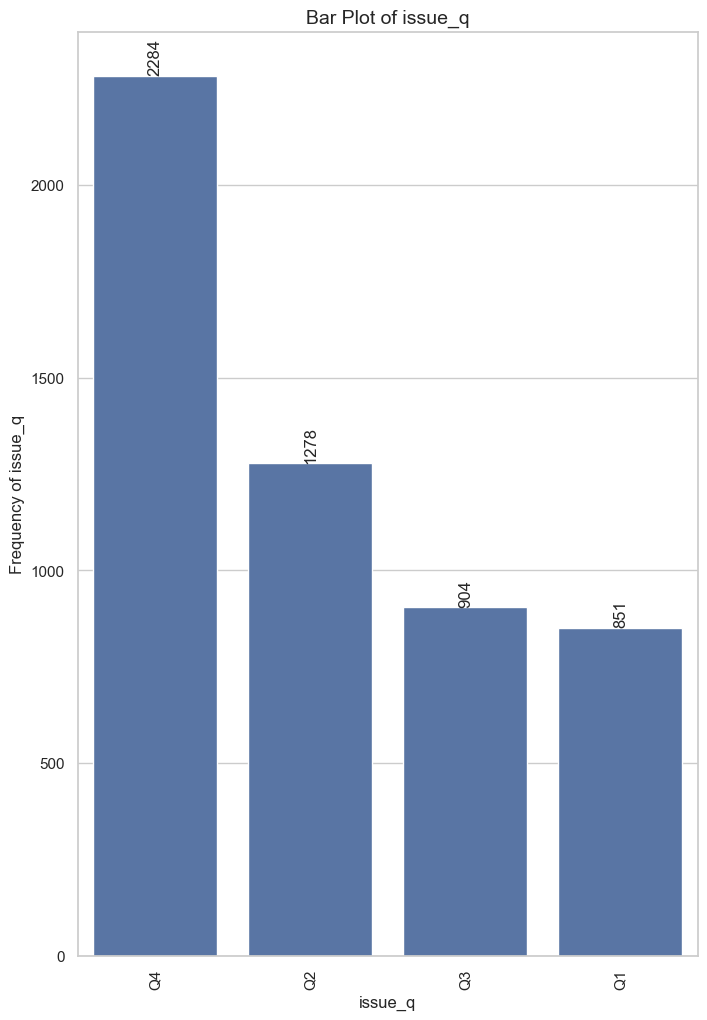

In [39]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']:
    plot_bar_graph(
        loan_df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

Unordered Categorical Variable

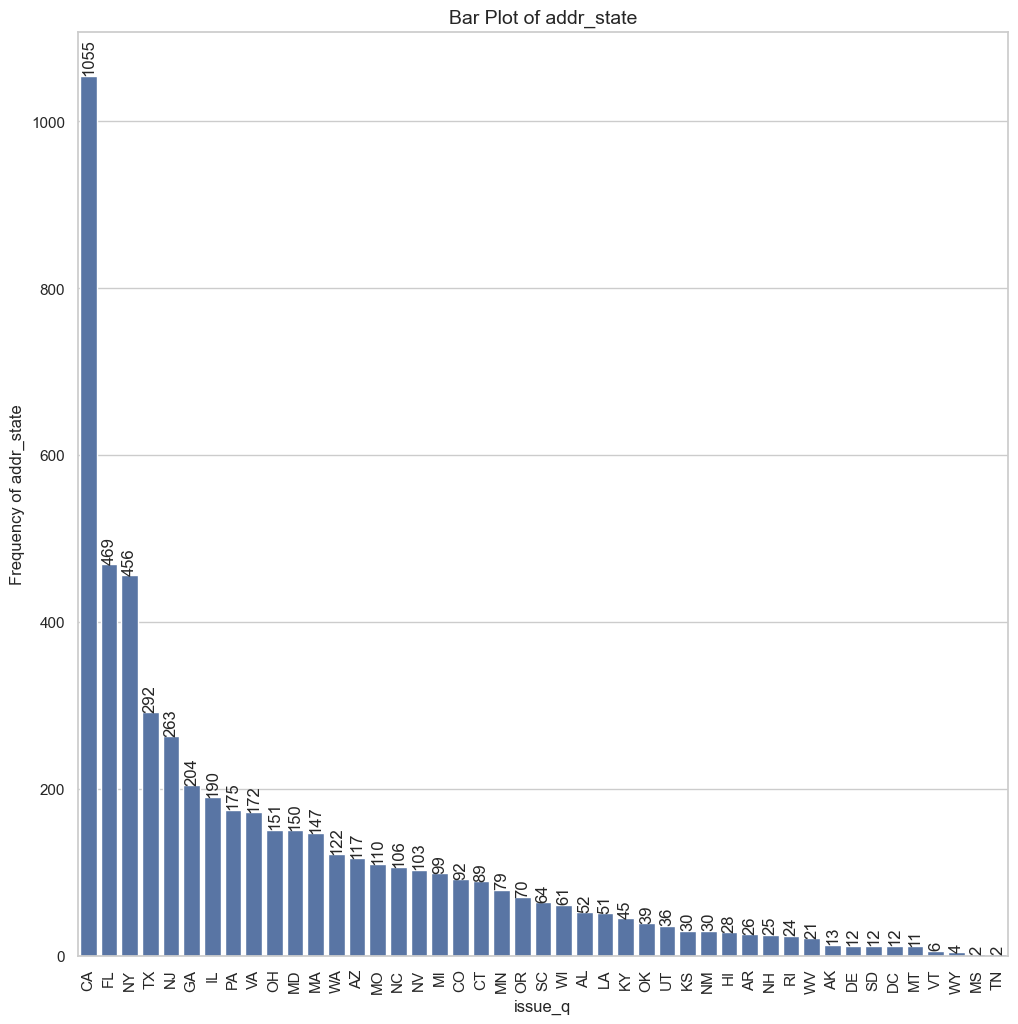

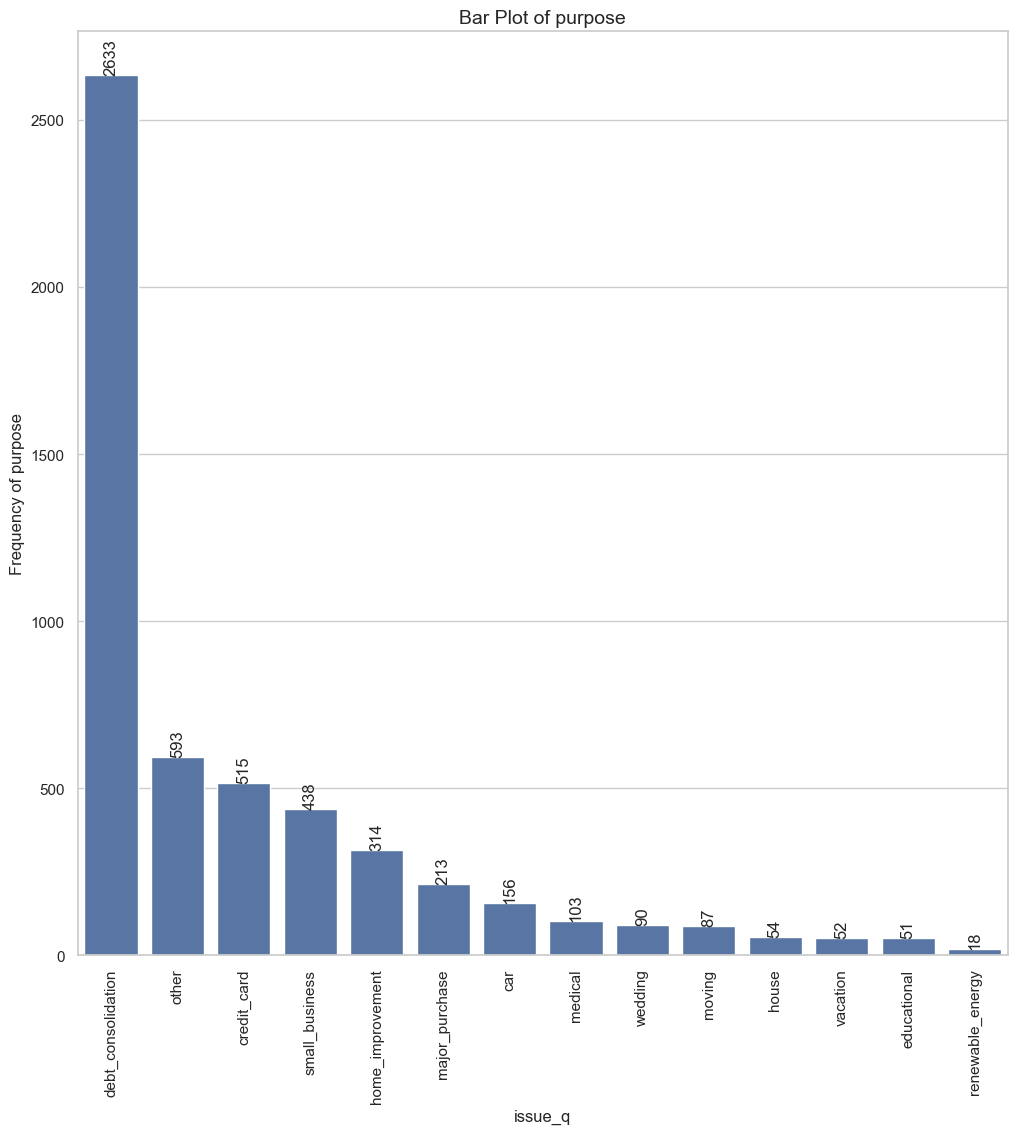

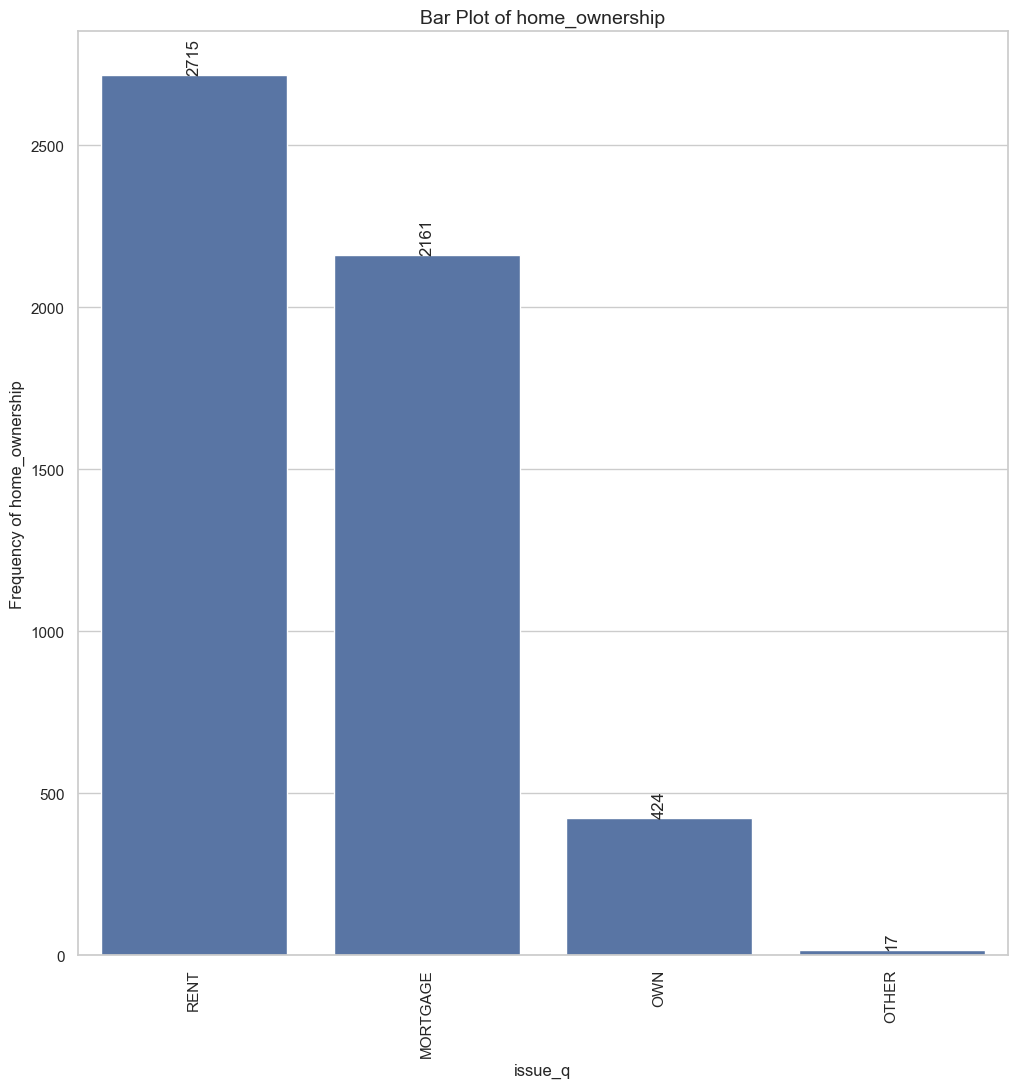

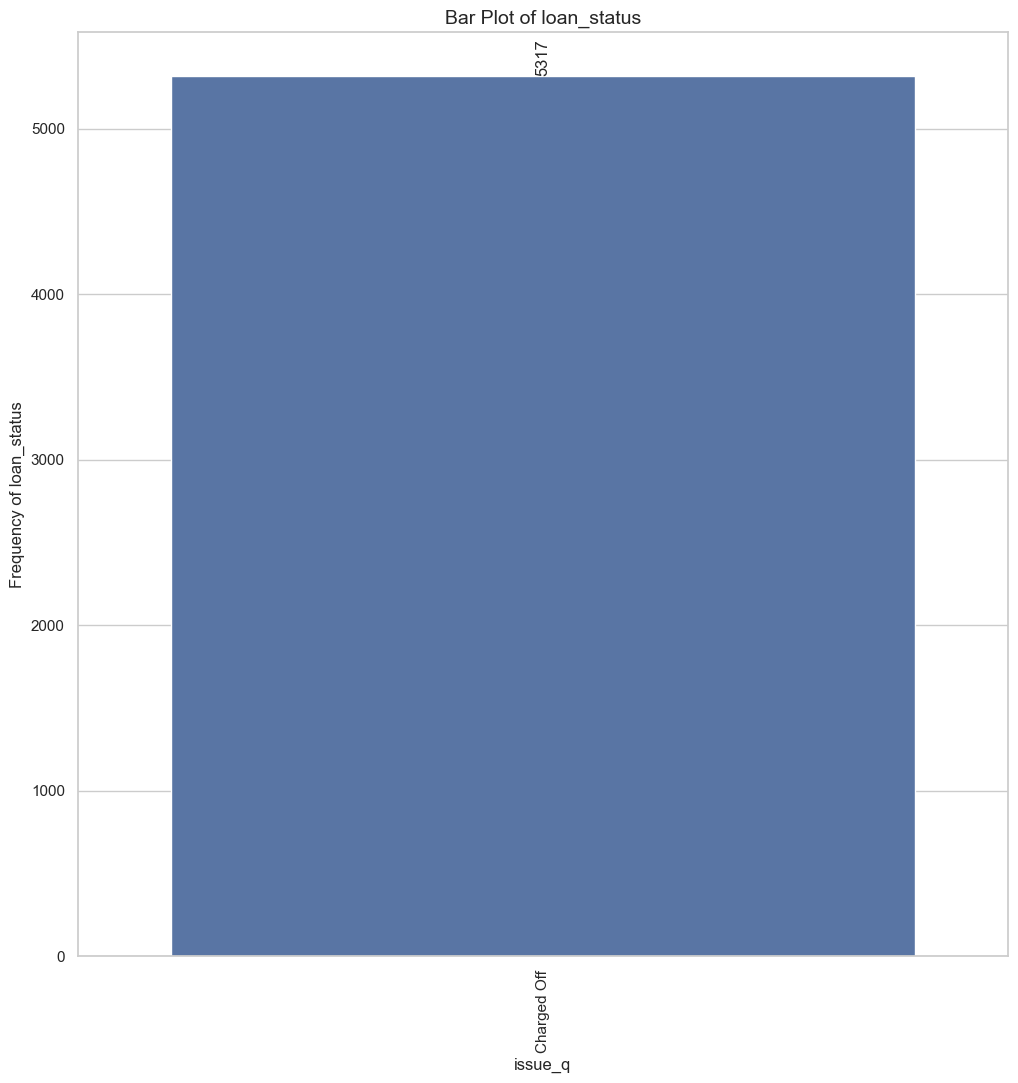

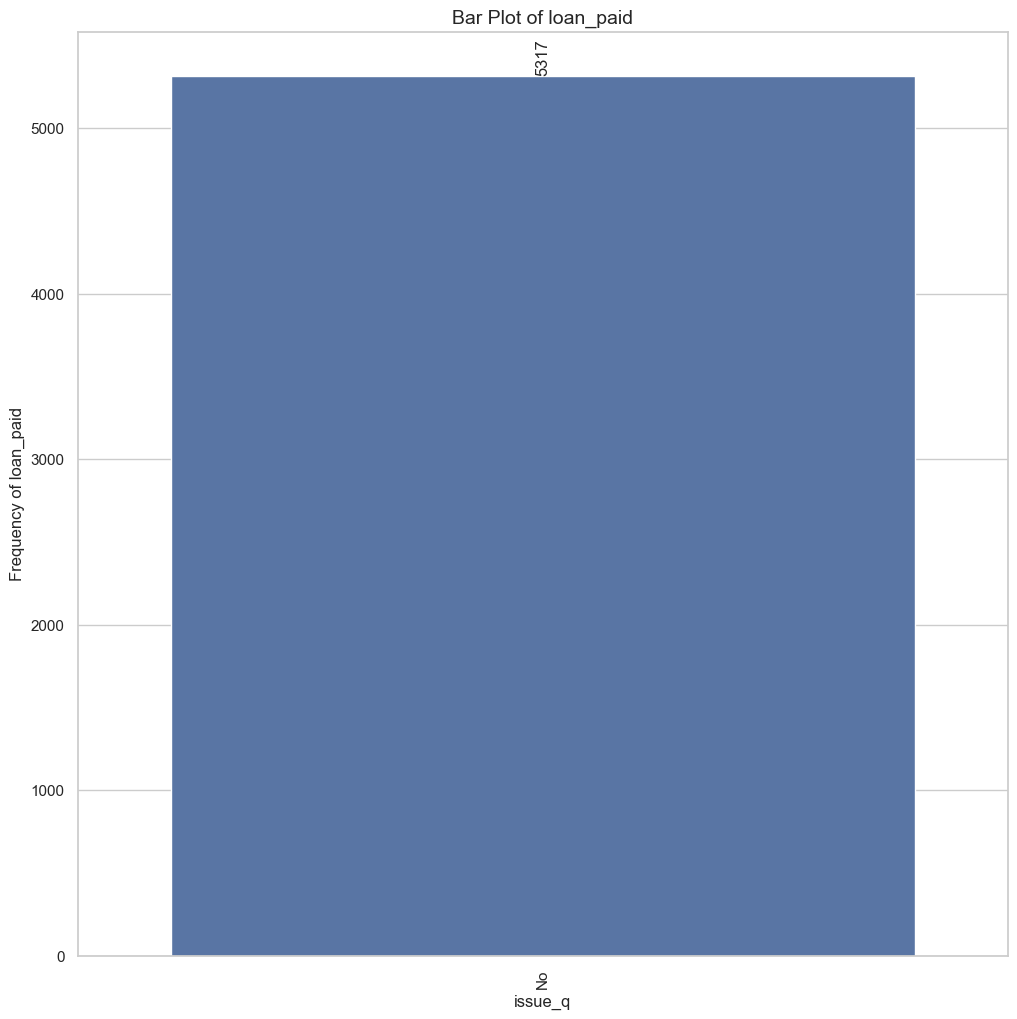

In [40]:
for un_cat_var in ['addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid']:
    plot_bar_graph(
        loan_df,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

Quantiative Variable

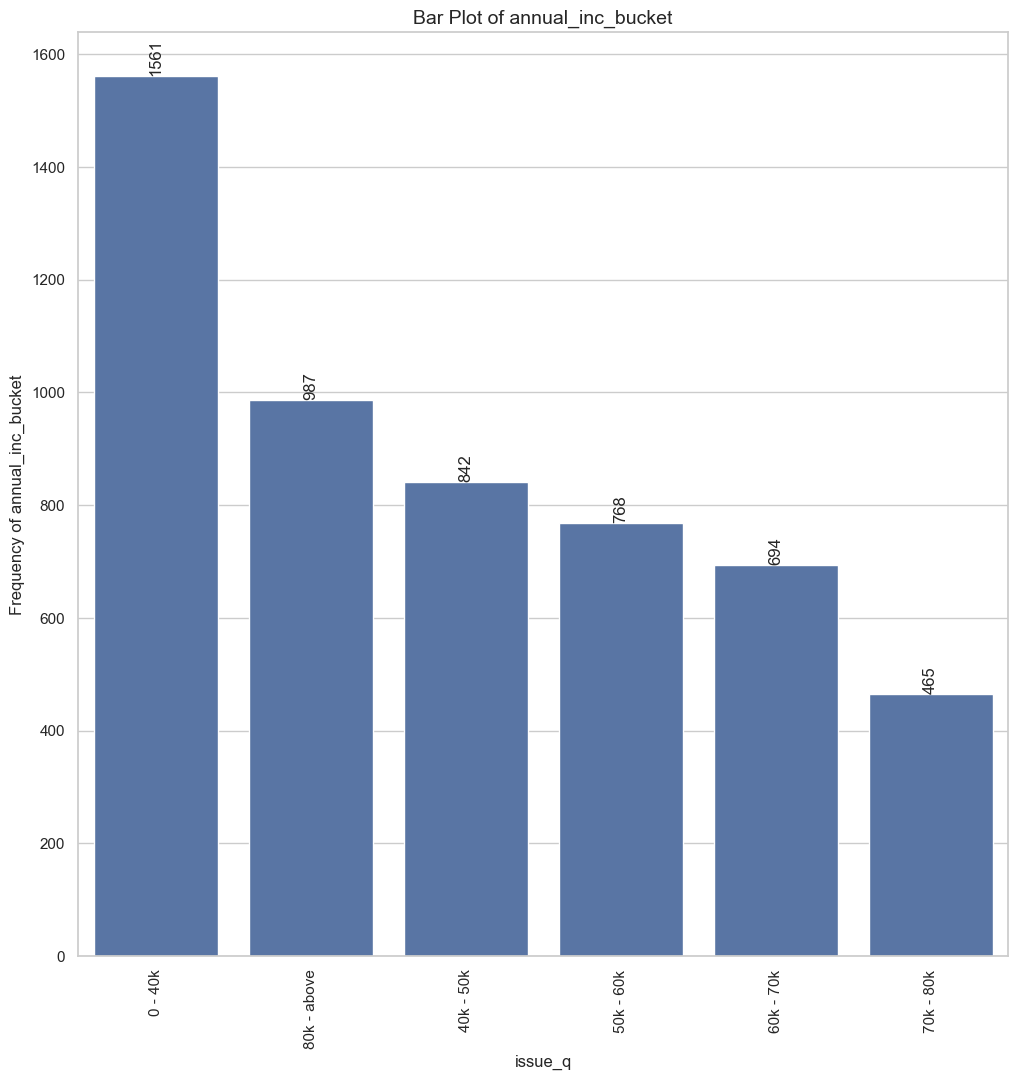

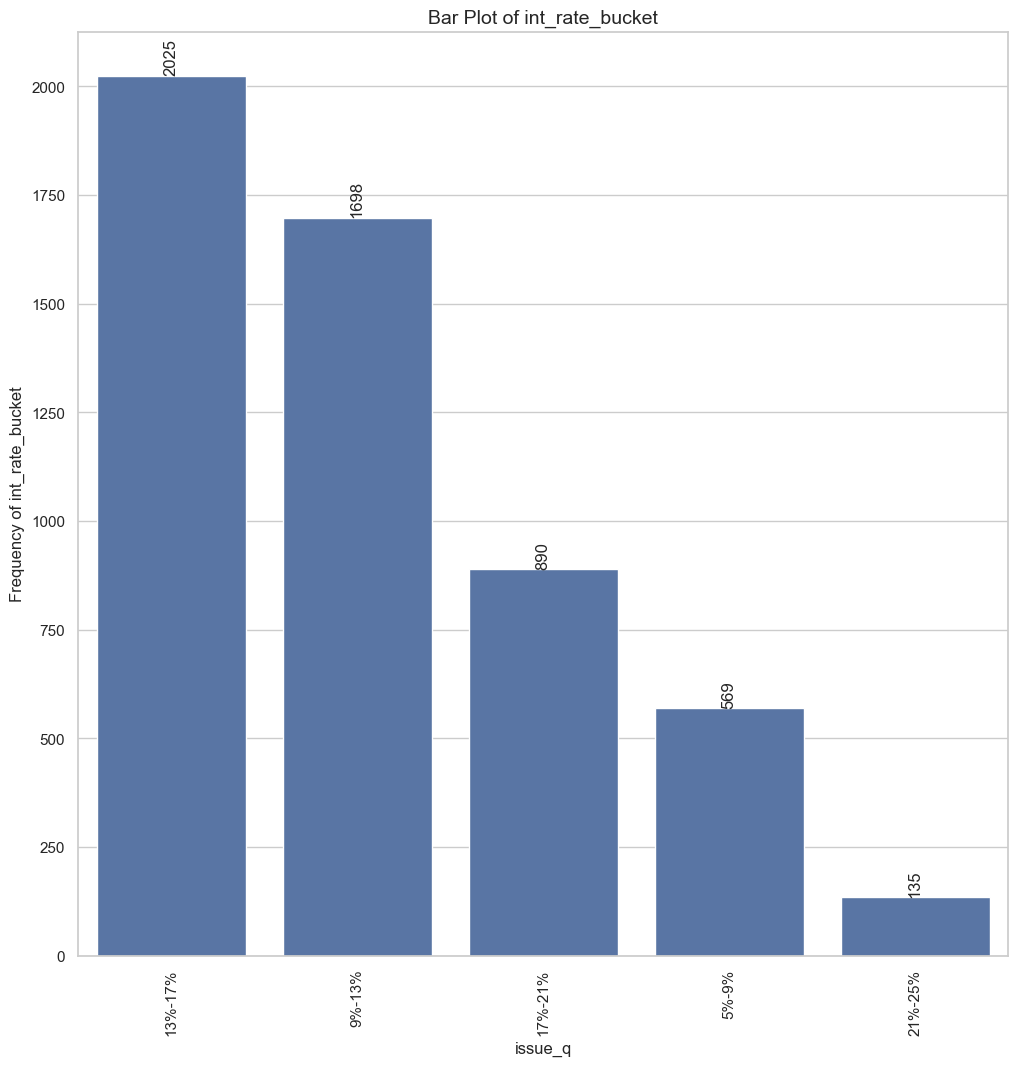

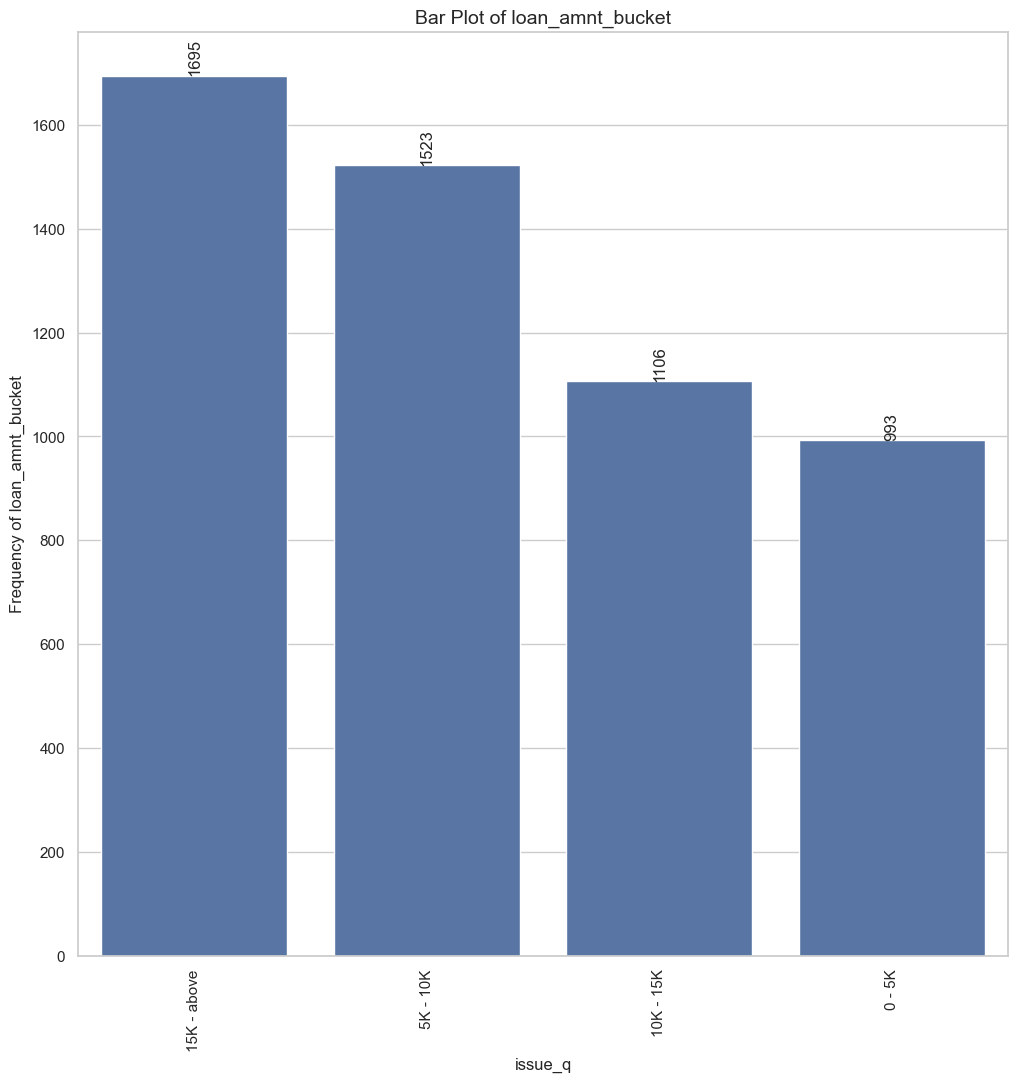

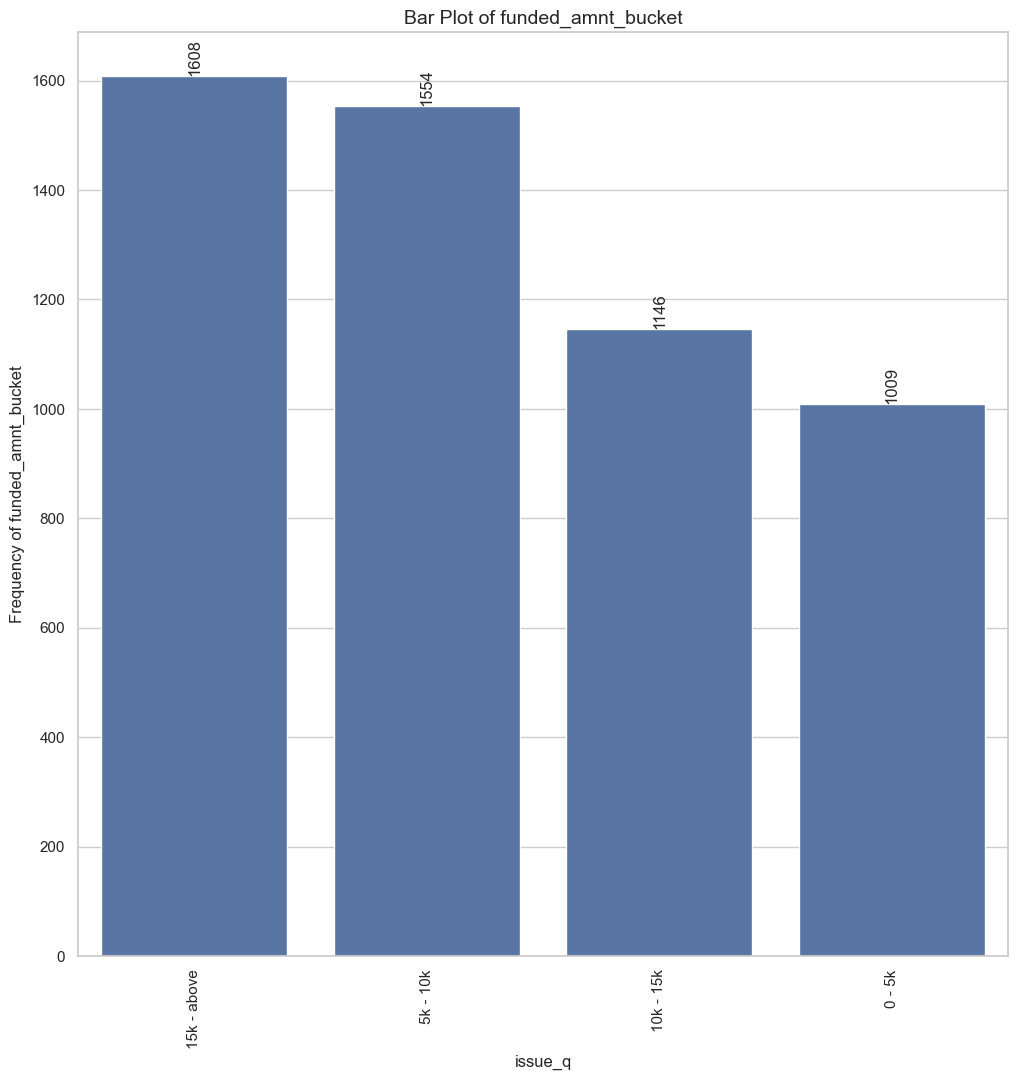

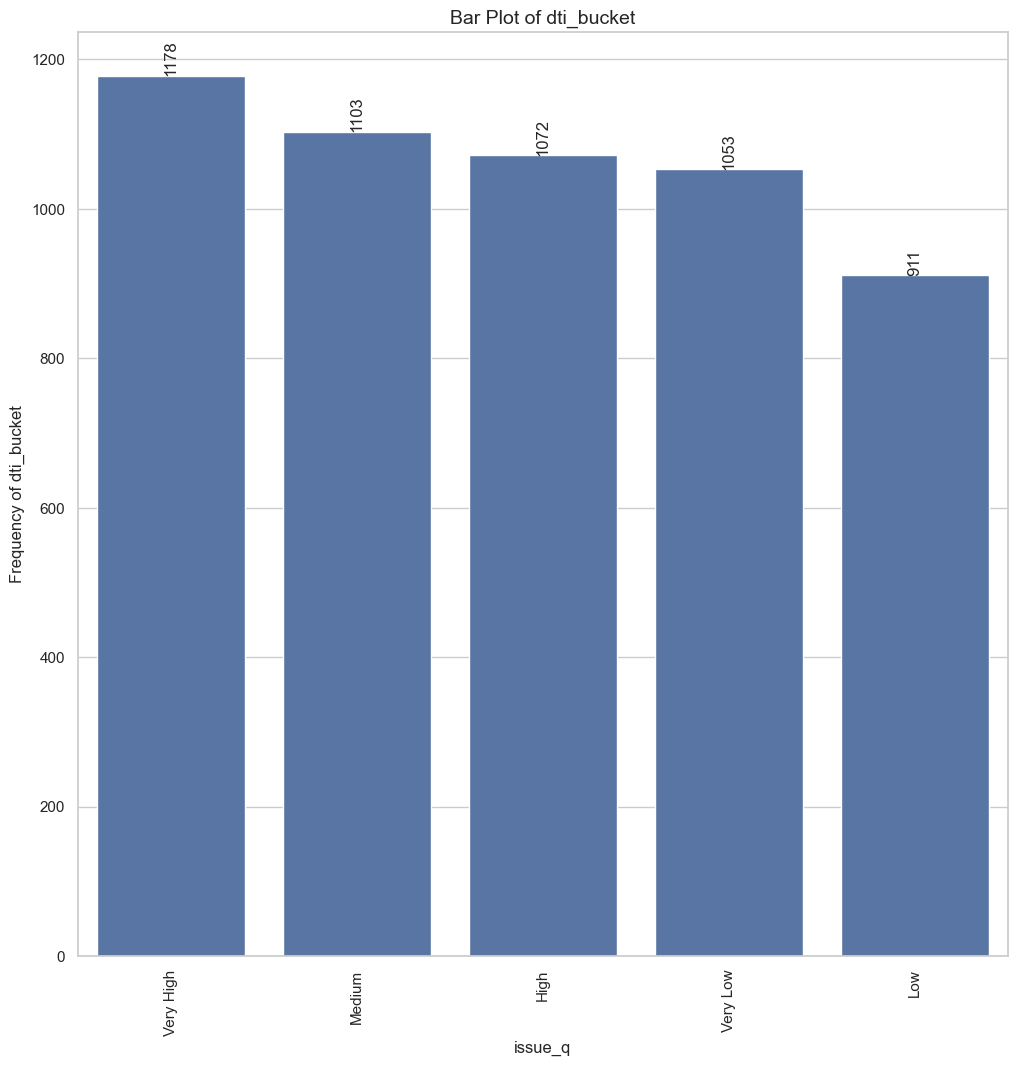

In [42]:
for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']:
    plot_bar_graph(
        loan_df,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Bar Plot of {quant_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

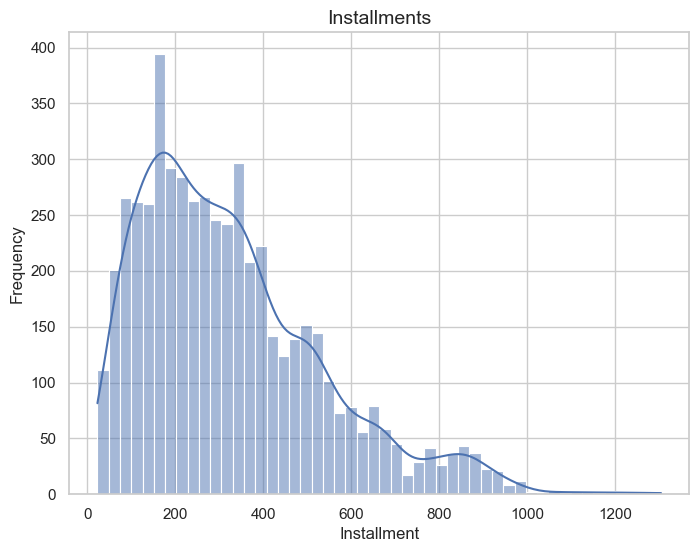

In [43]:
installments_df = loan_df[loan_df.loan_paid == 'No']
plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')

Bivariate Analysis

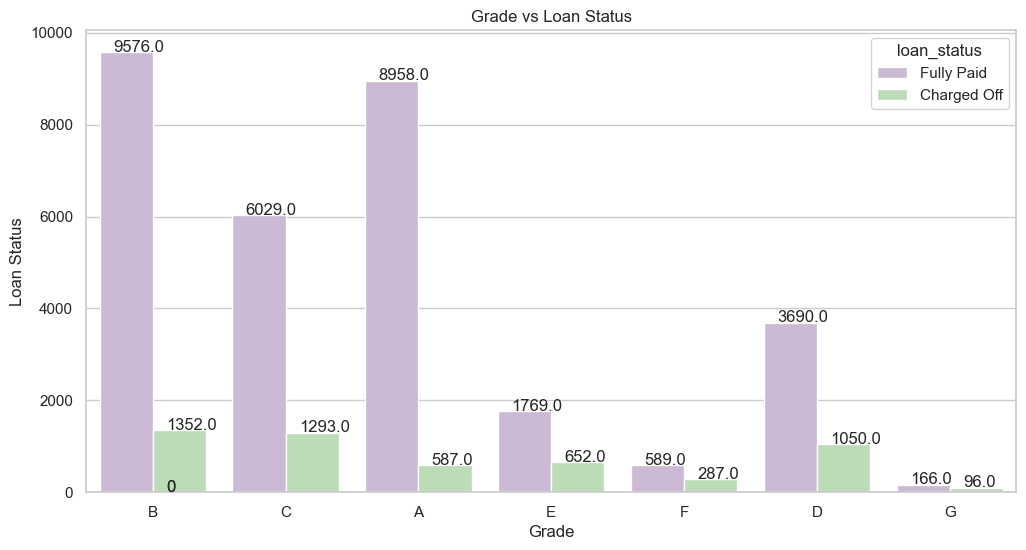

In [44]:
#GRADE VS lOAN STATUS
countplot_graph({
    'data': loan_df,
    'x': 'grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Grade',
    'ylabel': 'Loan Status',
    'title': 'Grade vs Loan Status',
    'palette': 'PRGn'
})

In [45]:
# TERM OF LOAN AND PERCENTAG OF PEOPLE DEFAULTING IT
charged_off_percent_36_m = charged_off_percent(loan_df, 'term', 36)
charged_off_percent_60_m = charged_off_percent(loan_df, 'term', 60)
print(f'Charged off pecentage for people taking loan for 60 months - {charged_off_percent_60_m}%')
print(f'Charged off pecentage for people taking loan for 36 months - {charged_off_percent_36_m}%')

Charged off pecentage for people taking loan for 60 months - 25.8%
Charged off pecentage for people taking loan for 36 months - 11.08%


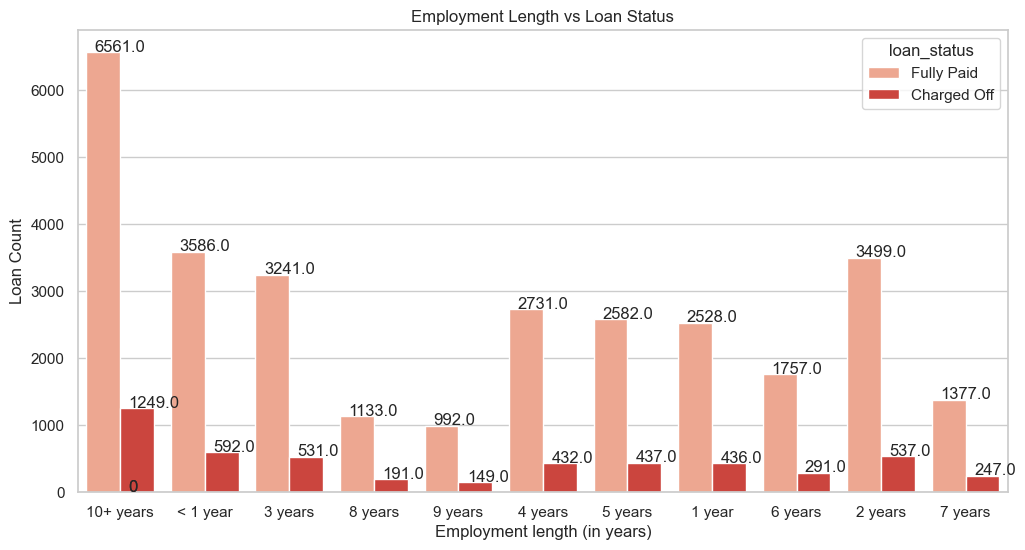

In [46]:
#LENGTH OF EMPLOYMENT AND LOAN STATUS
countplot_graph({
    'data': loan_df,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment length (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Length vs Loan Status',
    'palette': "Reds"
})

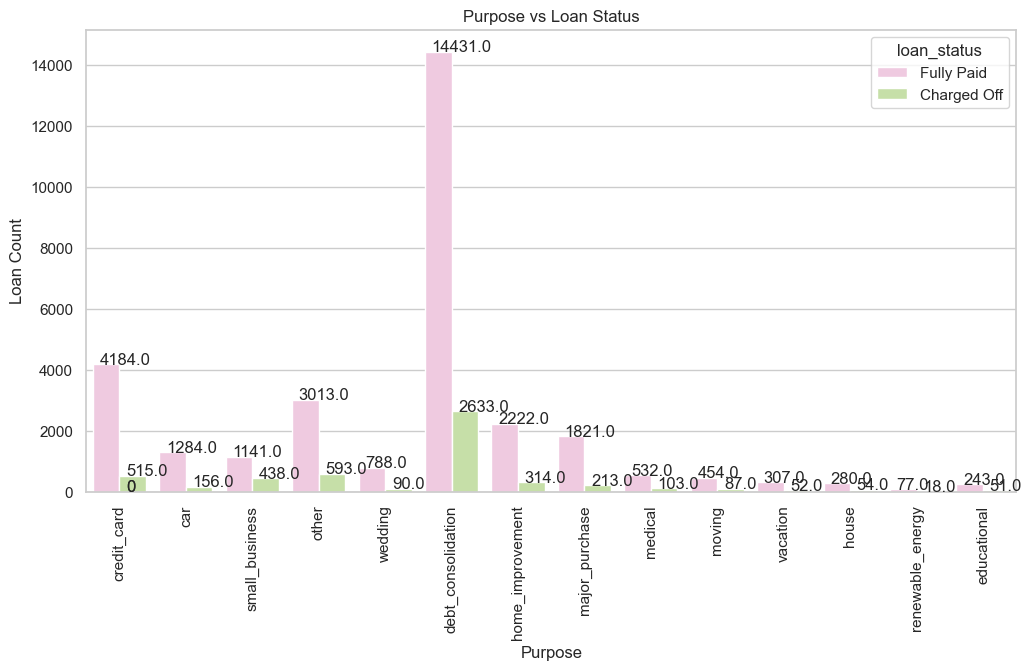

In [47]:
# PURPOSE VS LOAN STATUS
countplot_graph({
    'data': loan_df,
    'x': 'purpose',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Purpose',
    'ylabel': 'Loan Count',
    'title': 'Purpose vs Loan Status',
    'palette': "PiYG",
    'x_tick_rotation': 90
})

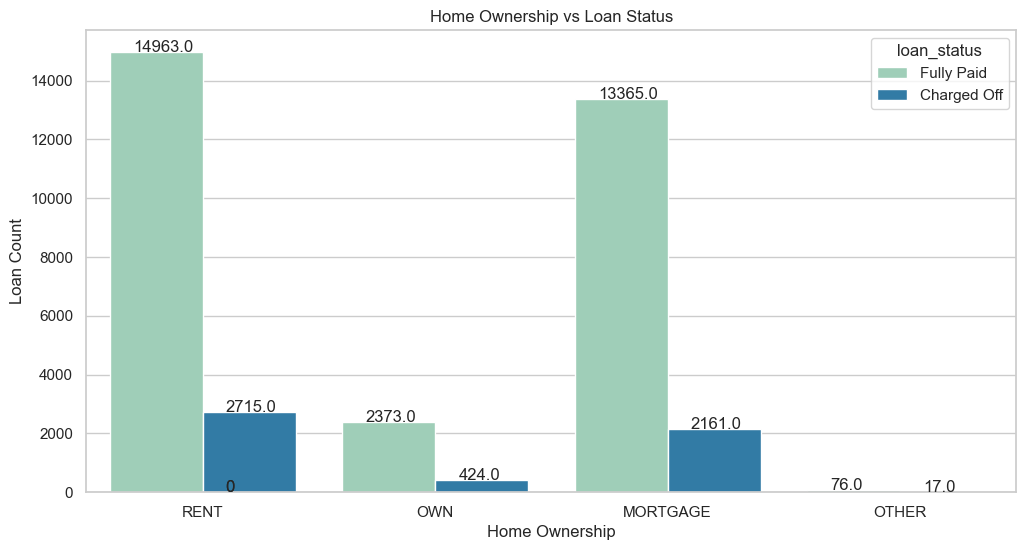

In [48]:
#HOME OWNERSHIP VS LOAN STATUS
countplot_graph({
    'data': loan_df,
    'x': 'home_ownership',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership vs Loan Status',
    'palette': "YlGnBu"
})

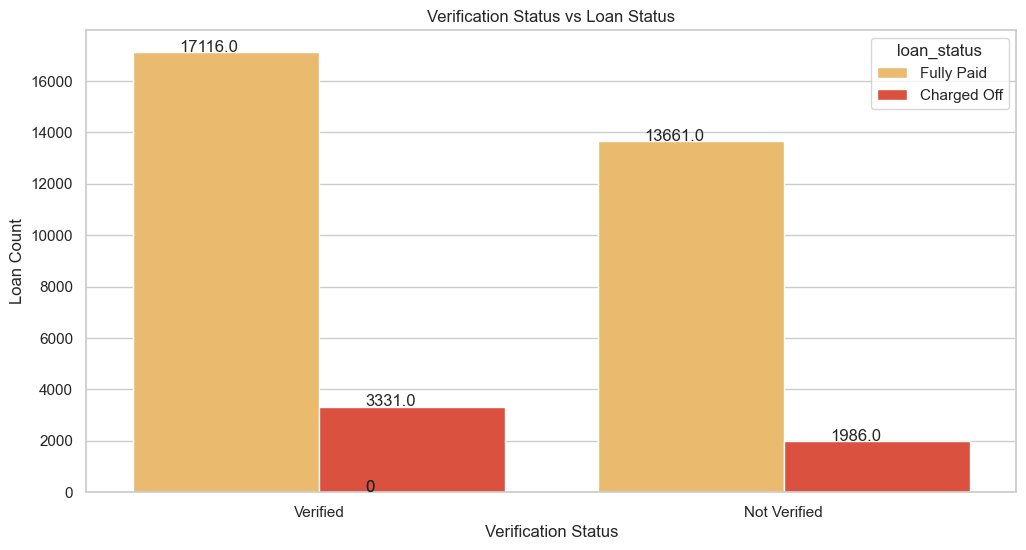

In [49]:
#VERIFICATION VS LOAN STATUS
countplot_graph({
    'data': loan_df,
    'x': 'verification_status',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Verification Status',
    'ylabel': 'Loan Count',
    'title': 'Verification Status vs Loan Status',
    'palette': "YlOrRd"
})

Correlation Analysis

In [50]:
# Dropping columns which are irrelevant to analysis
correlation_df = loan_df.copy()
correlation_df = correlation_df.drop(['issue_y', 'issue_m'], axis = 1)


In [51]:
import scipy

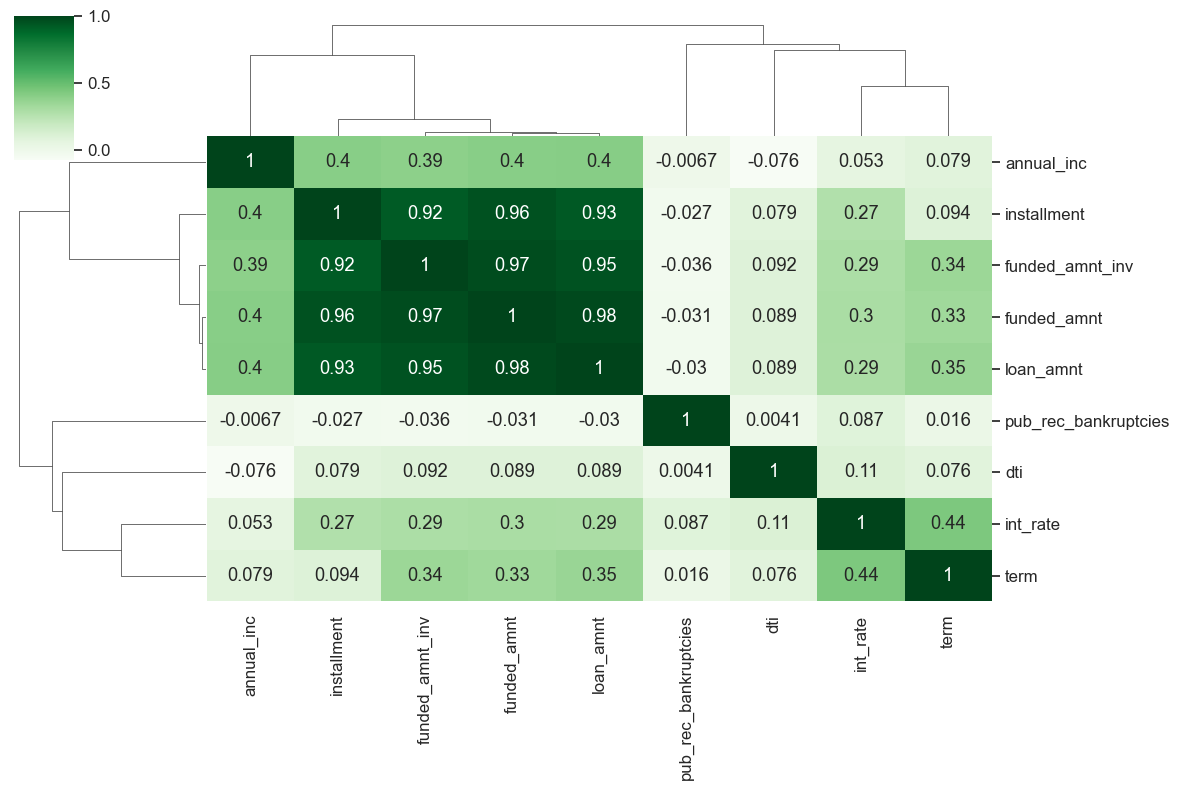

In [52]:
import scipy
corr = correlation_df.corr(numeric_only=True)
sns.set(font_scale=1.1)

sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plt.show()

Multivariate Analysis

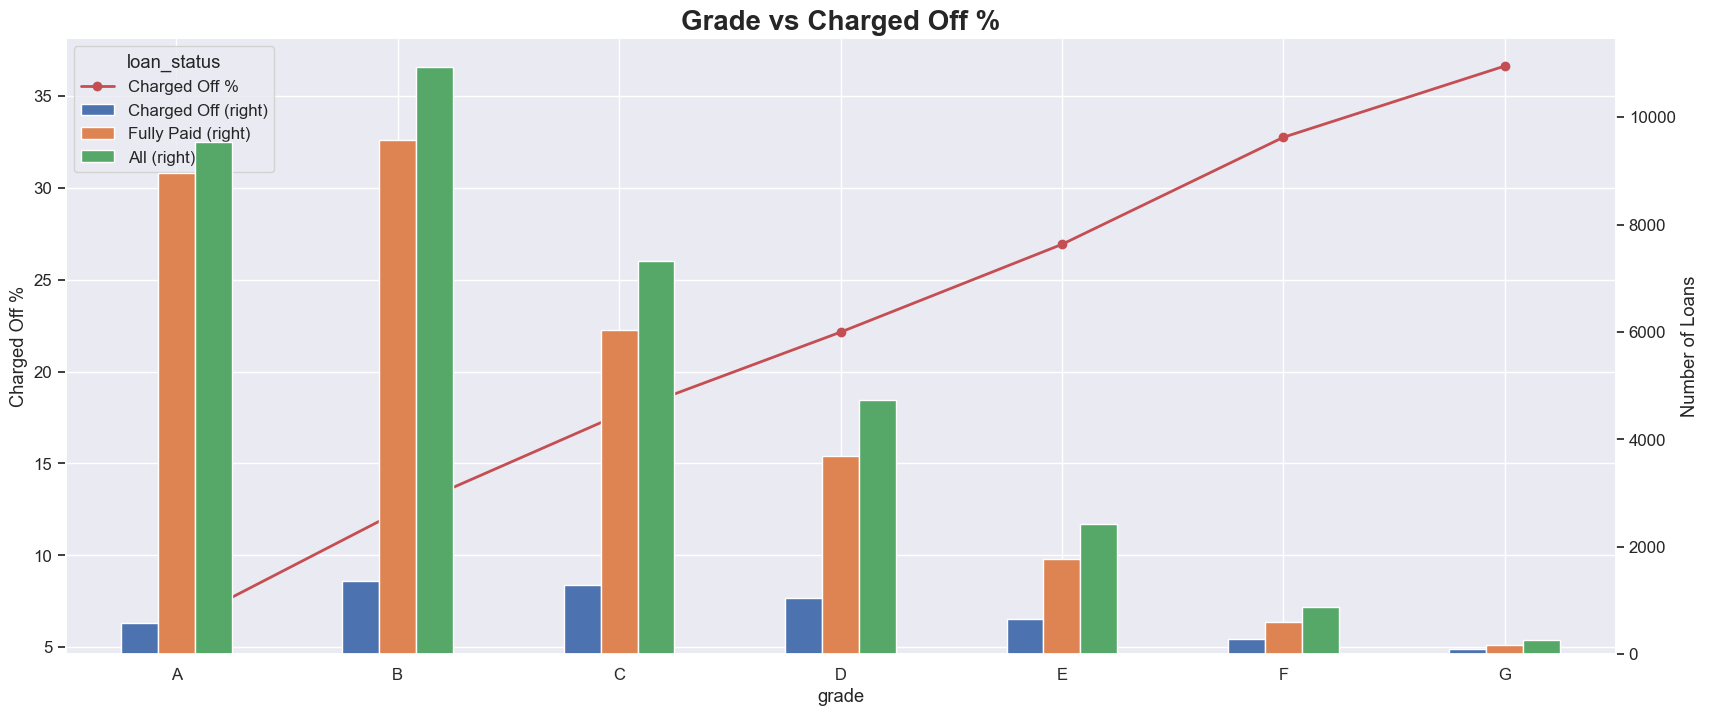

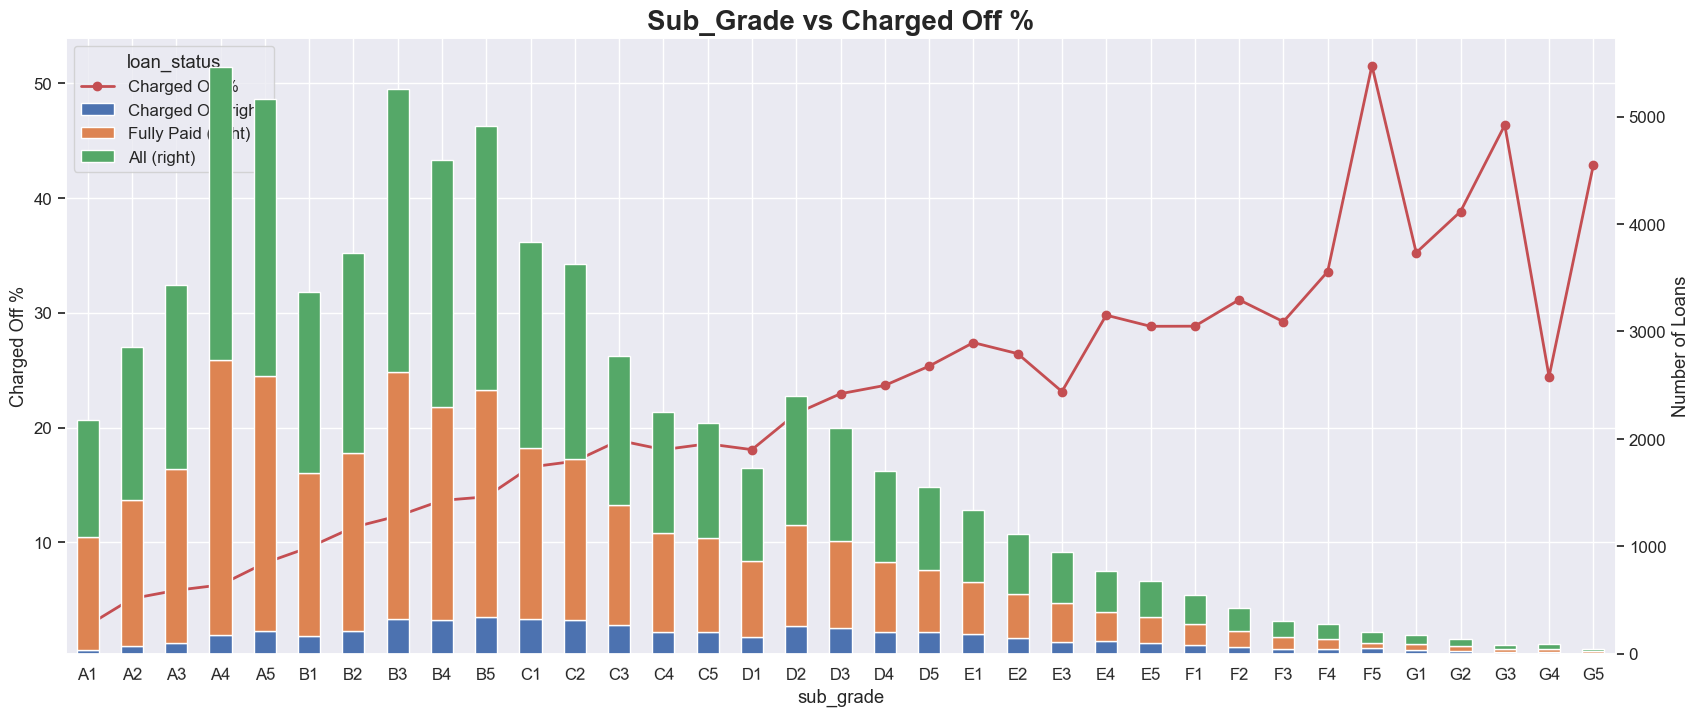

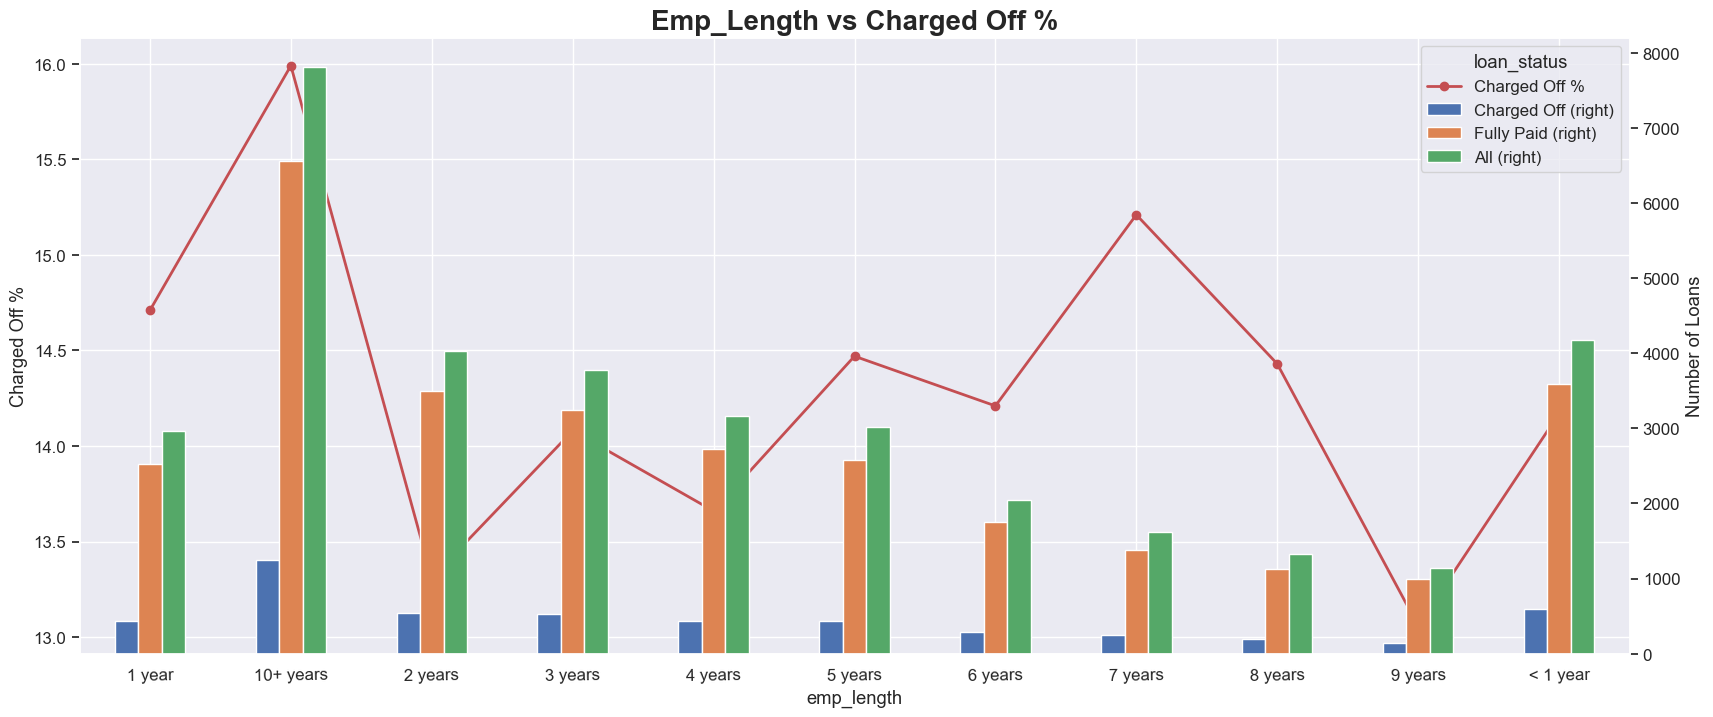

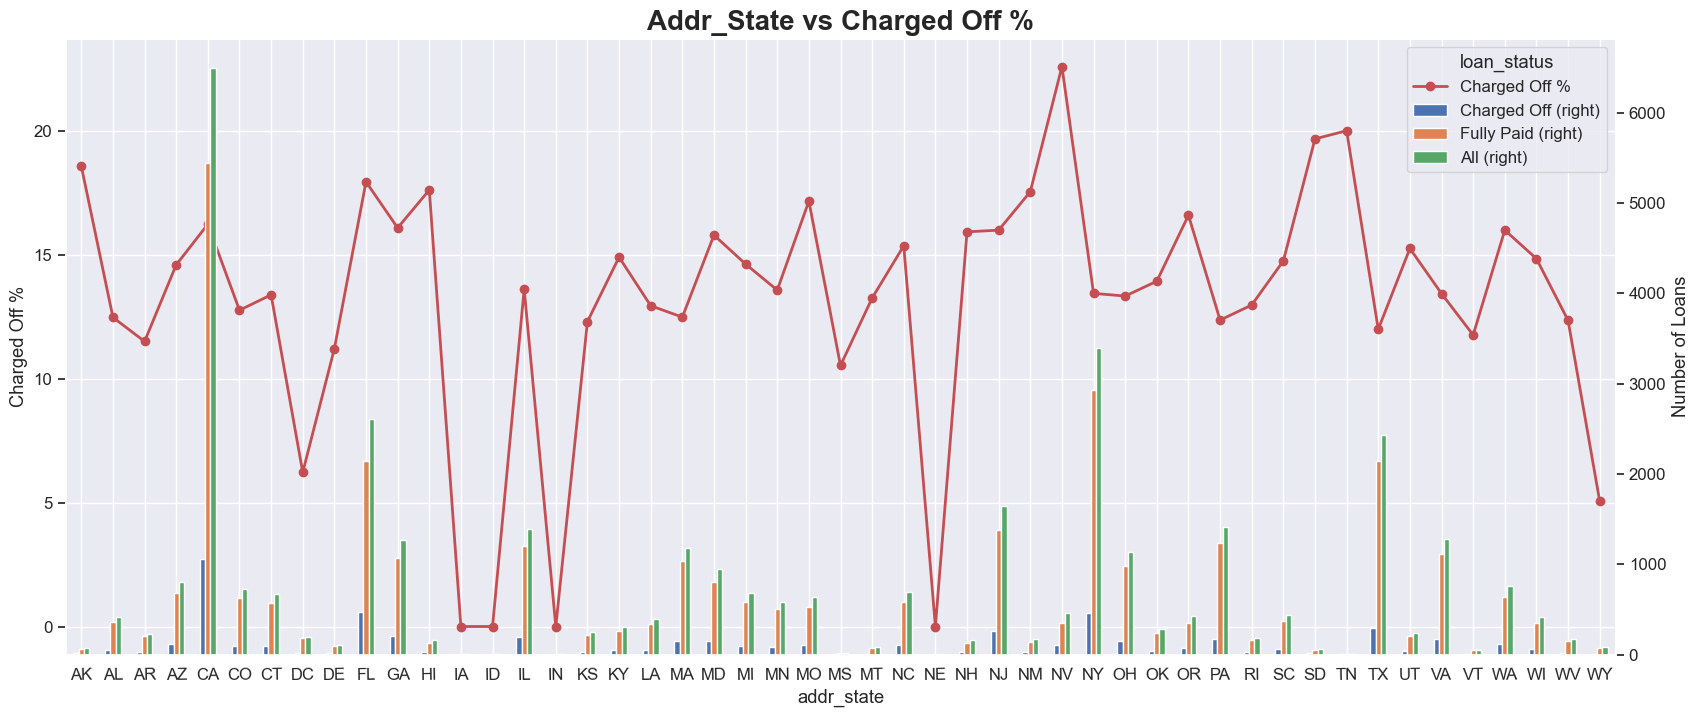

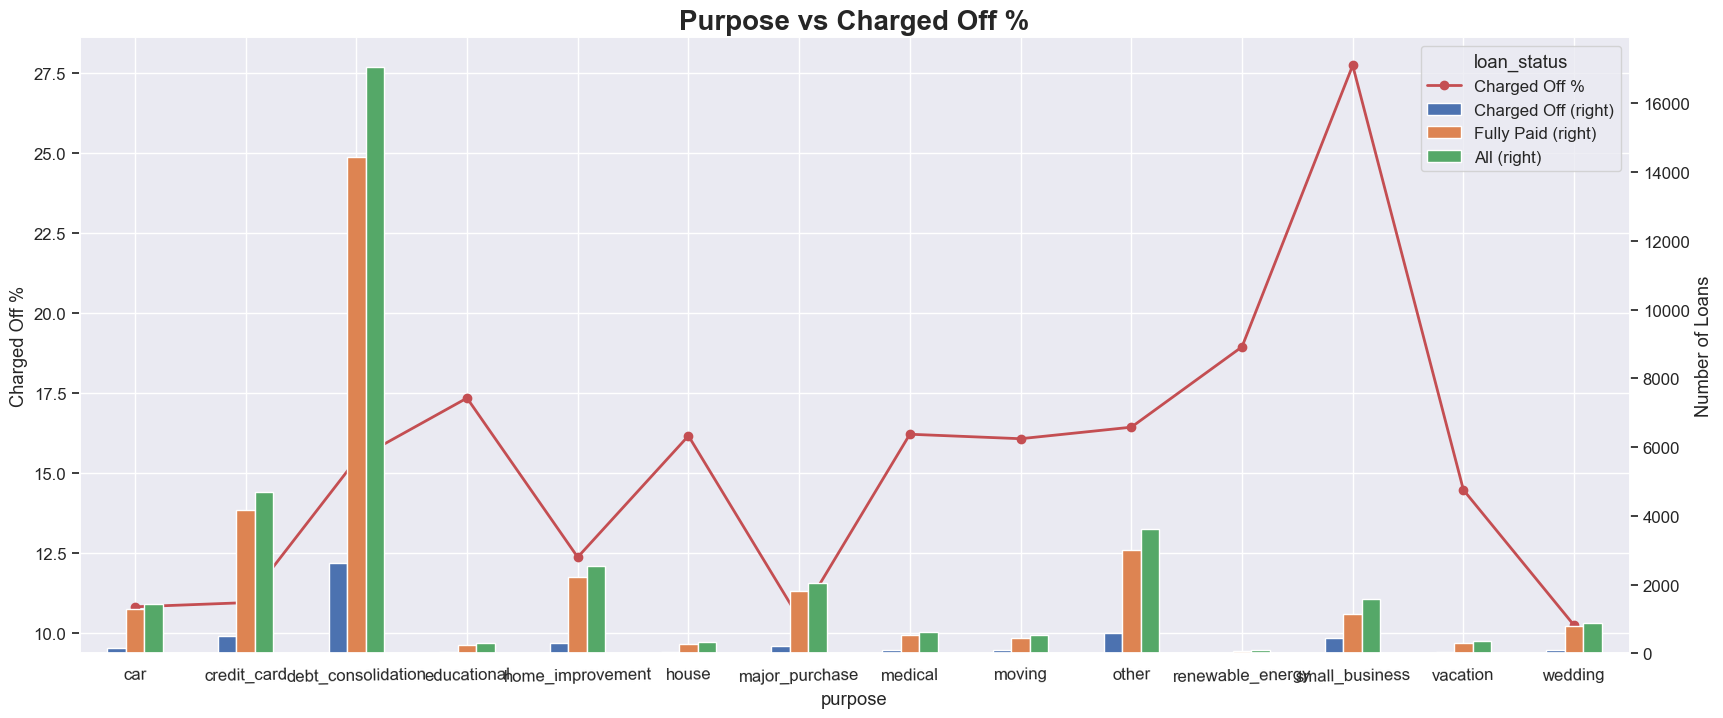

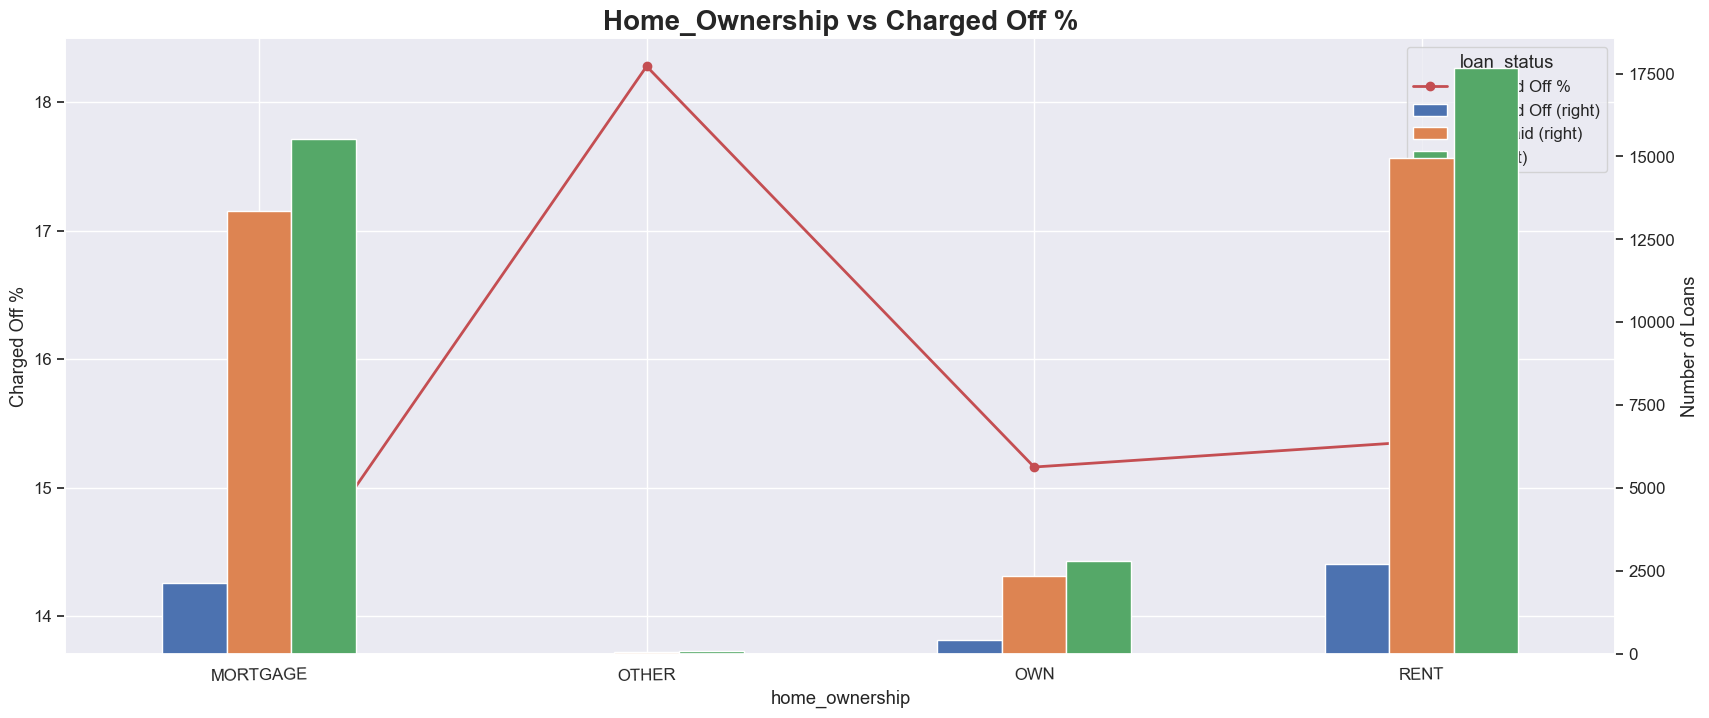

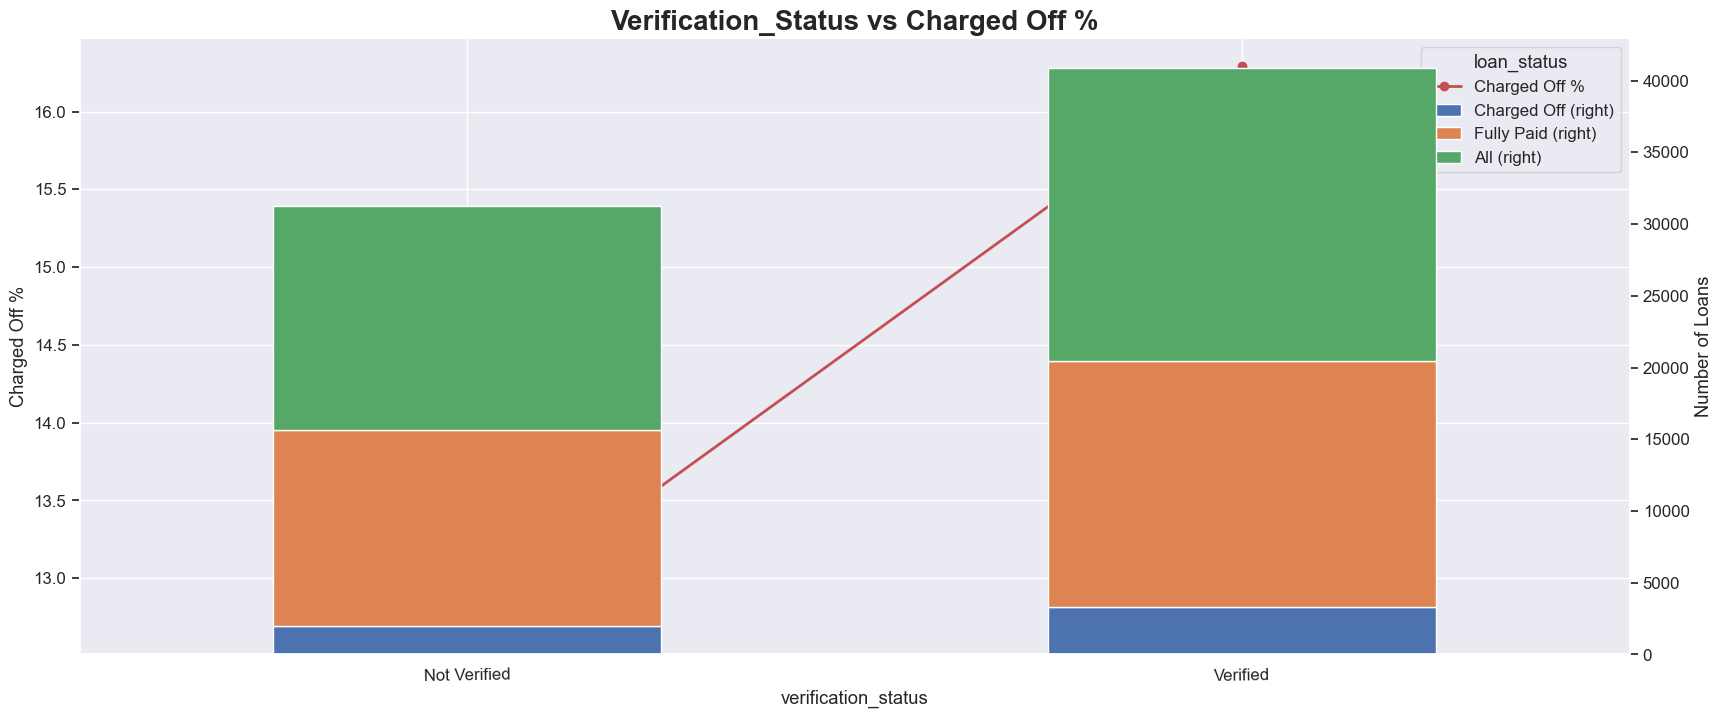

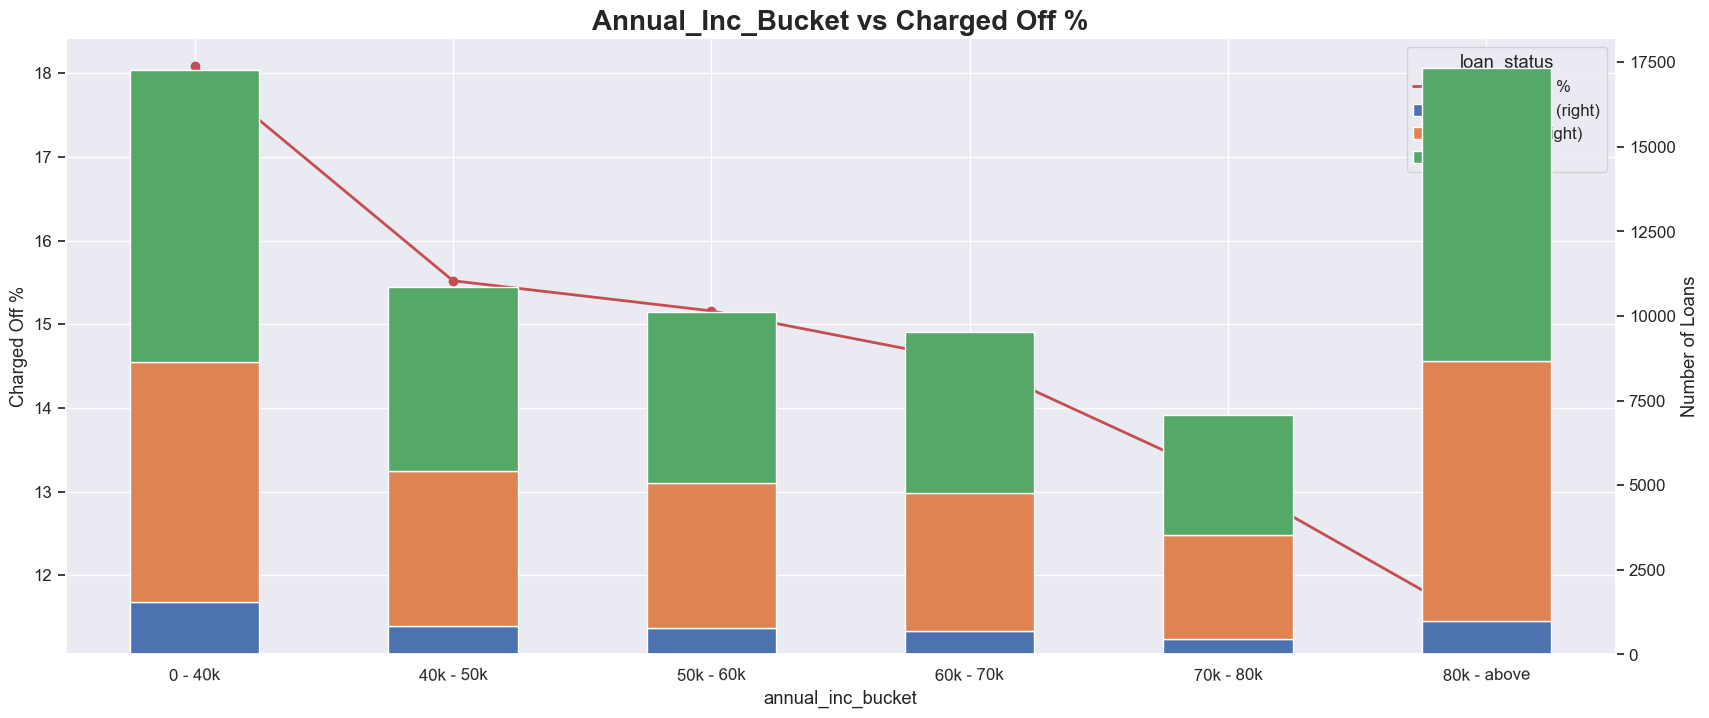

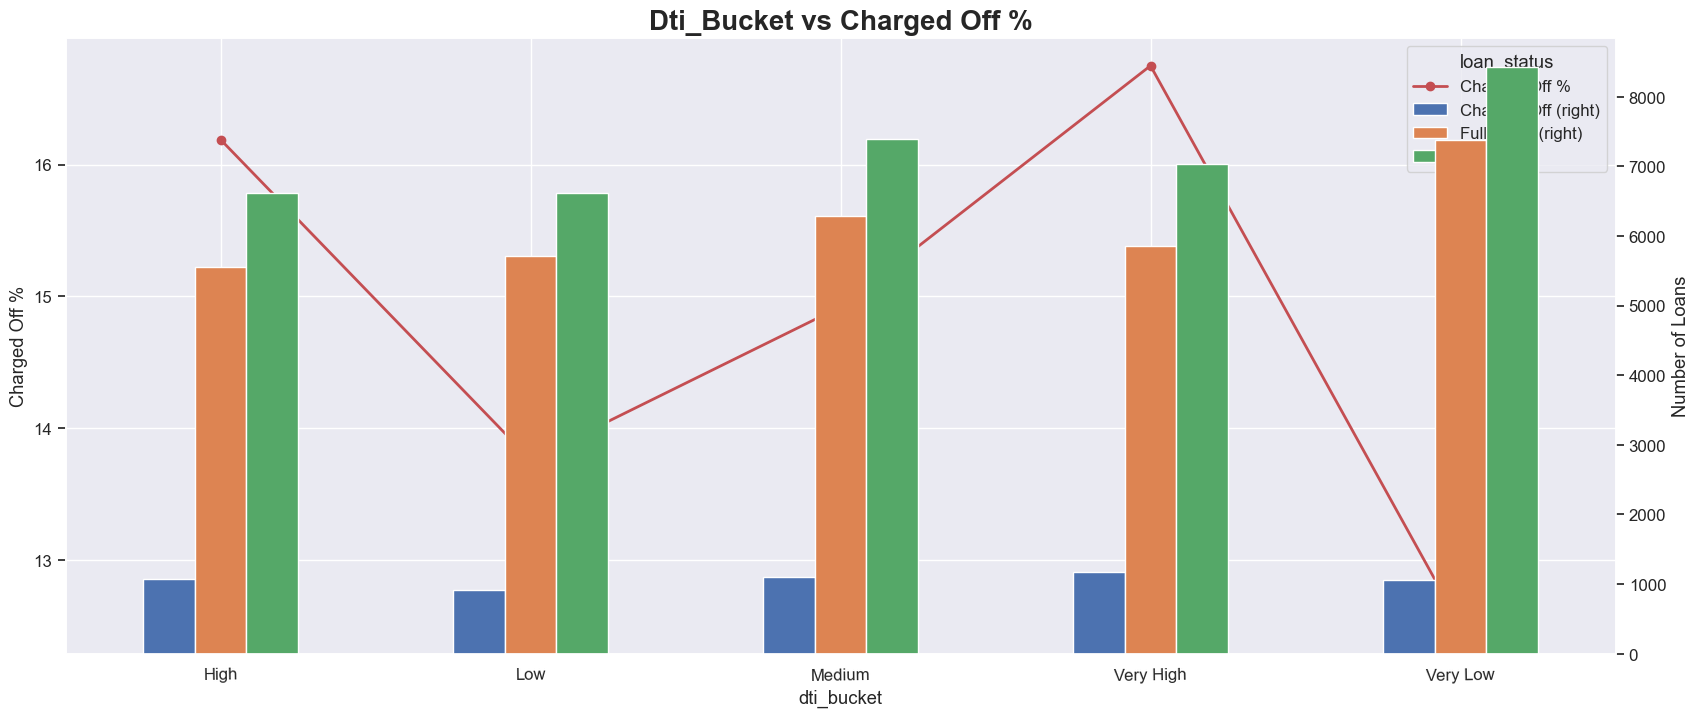

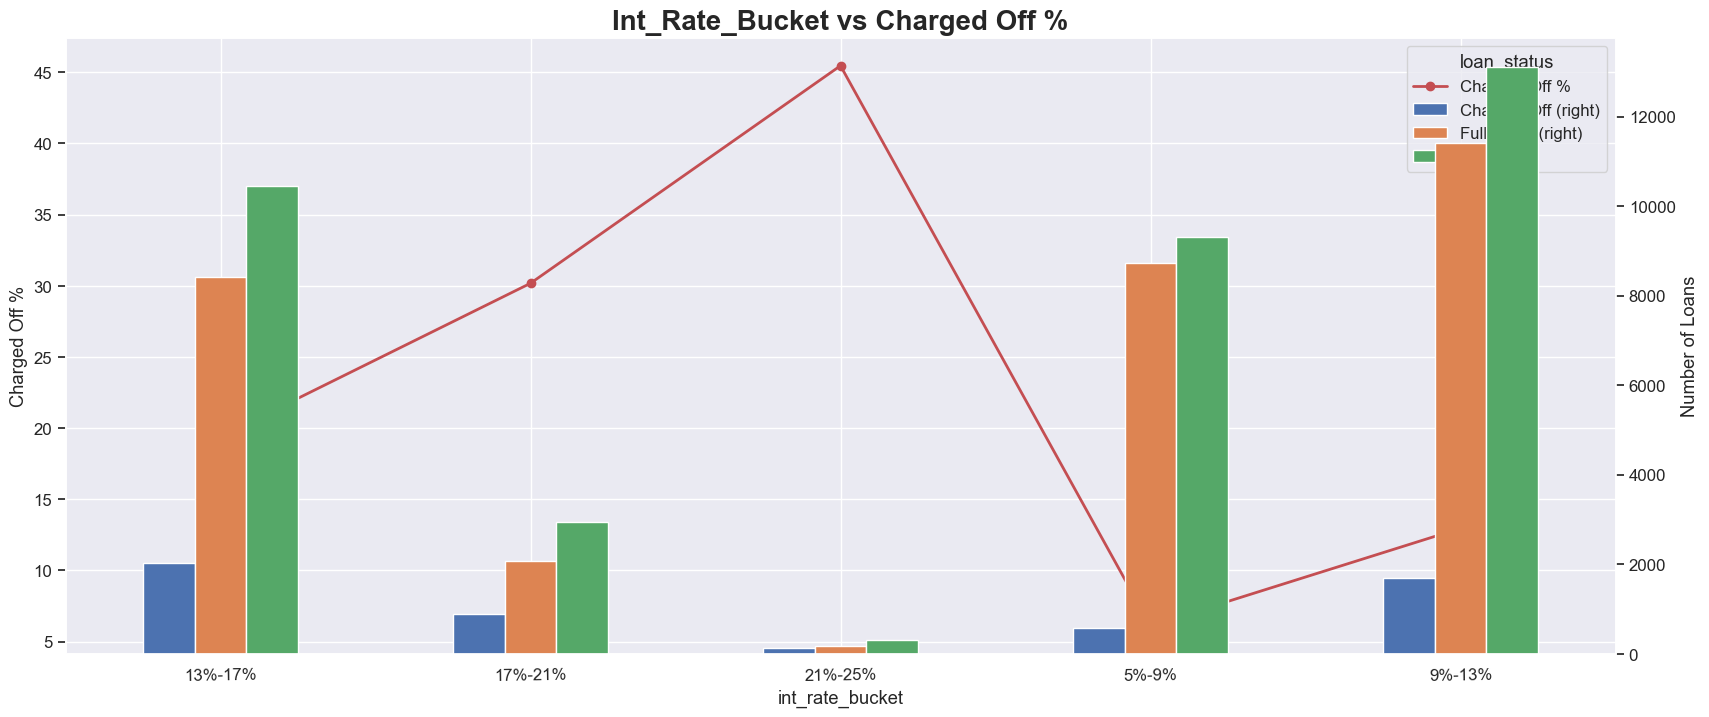

In [53]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(loan_df, column, stacked)
